# House Prices - Advanced Regression Techniques
Predict sales prices and practice feature engineering, RFs, and gradient boosting

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression, ElasticNet, ARDRegression
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

import warnings
warnings.simplefilter('ignore')

# Importing data

as the test is only for the competition we will only be dealing with the train that has the target included.  If you want to submit take the test and I've prepared how to would predict and submit the test. 

In [3]:
train = 'https://raw.githubusercontent.com/brandynewanek/guided_projects/main/house_prices_train.csv'
test = 'https://raw.githubusercontent.com/brandynewanek/guided_projects/main/house_prices_test.csv'
df = ###(train)
df_test = ###(test)

## test_ids

In [4]:
test_ids = df_test['Id'] # at end in the predictions submission format for the competition

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# shape of data
df.shape

(1460, 81)

**Observations**

**81 features**

With only 1481 rows to make our model predictive and prevent over fitting we will need to reduce the number of features, this can be accomplished in many ways.  I'll use shapely values as those give one of the best understandings of how a model is making predictions.

In [7]:
# examine the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# EDA

## Univariate

Inspecting the distributions

<Figure size 1152x288 with 0 Axes>

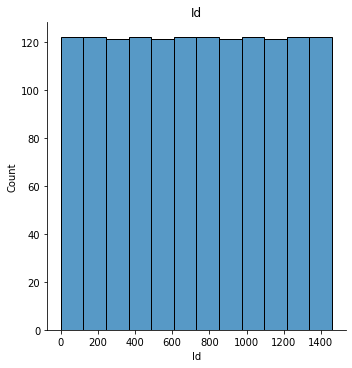

<Figure size 1152x288 with 0 Axes>

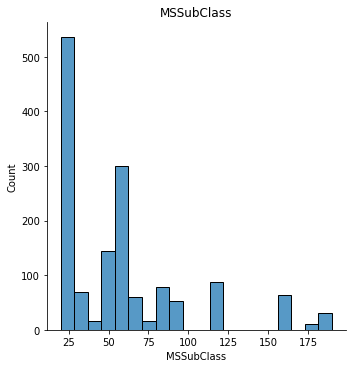

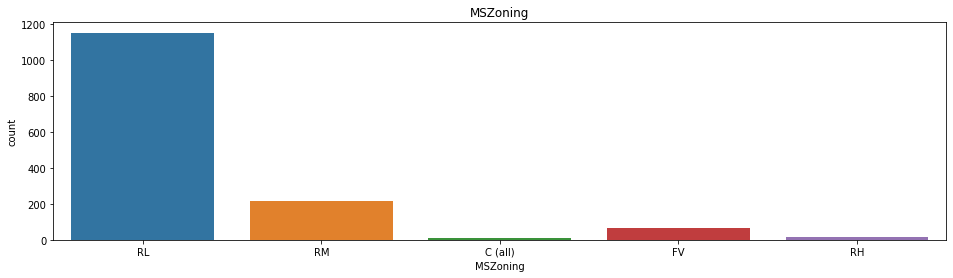

<Figure size 1152x288 with 0 Axes>

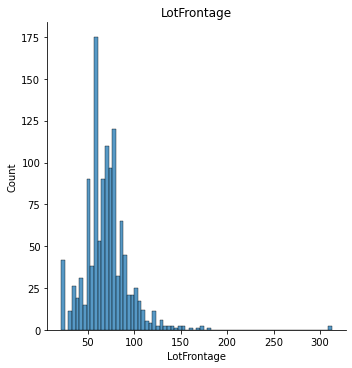

<Figure size 1152x288 with 0 Axes>

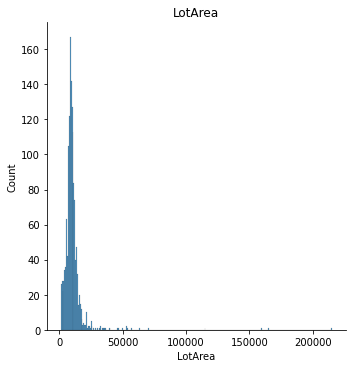

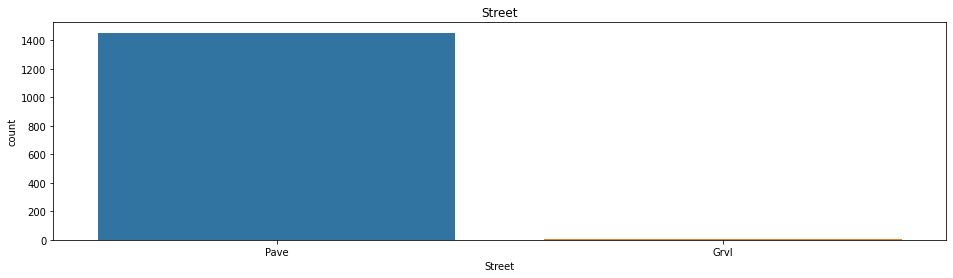

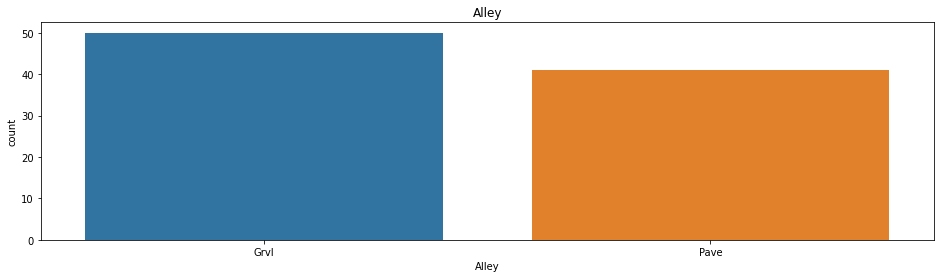

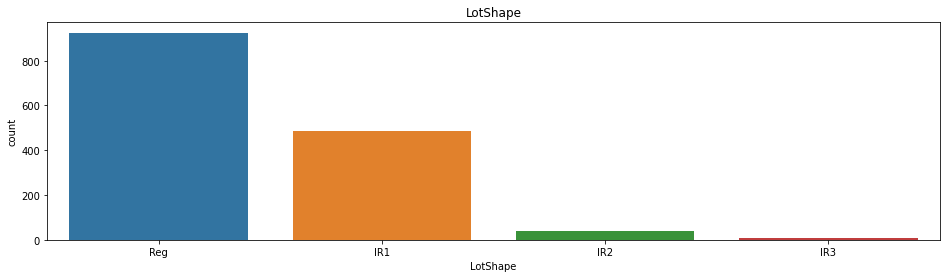

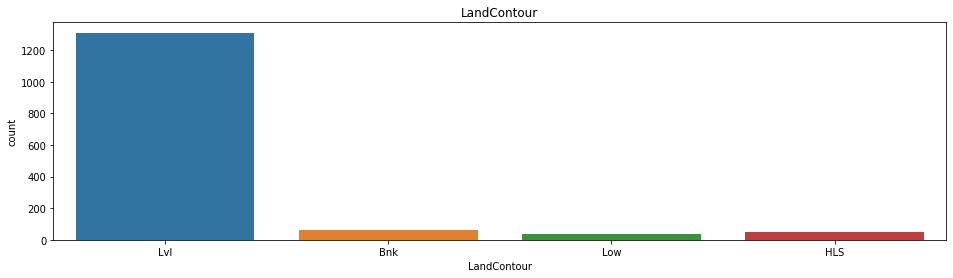

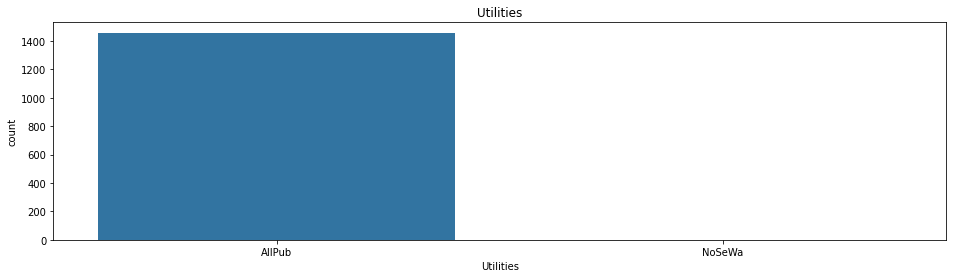

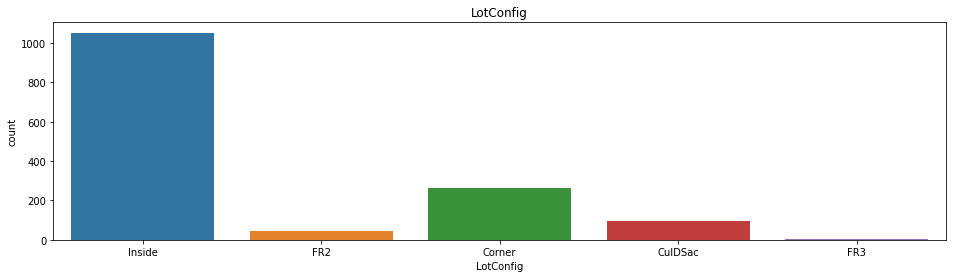

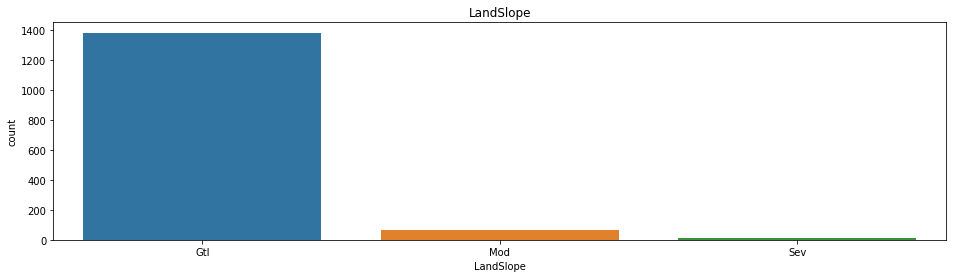

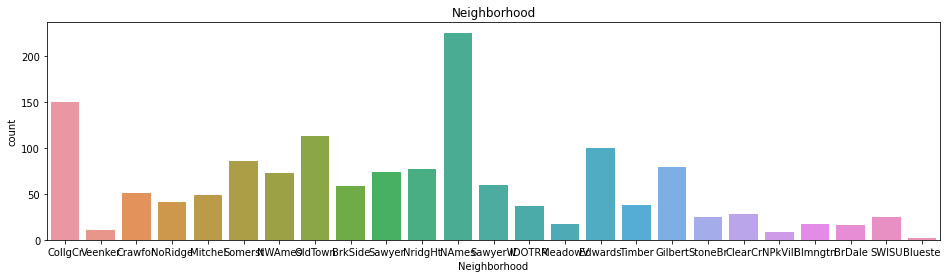

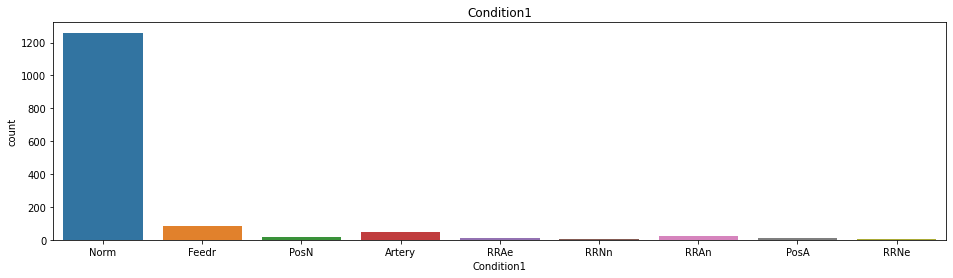

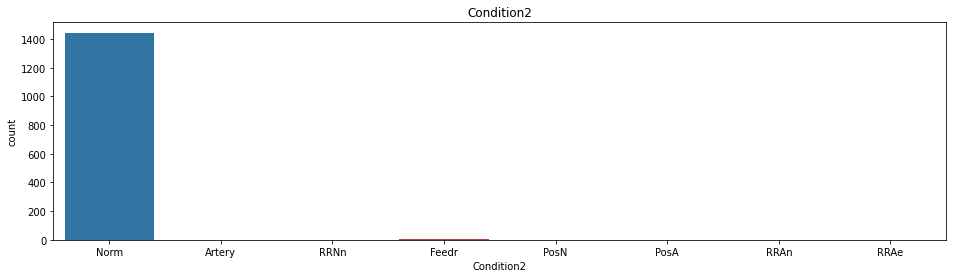

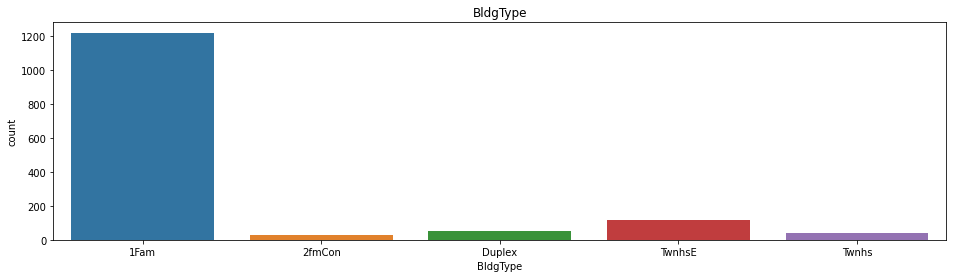

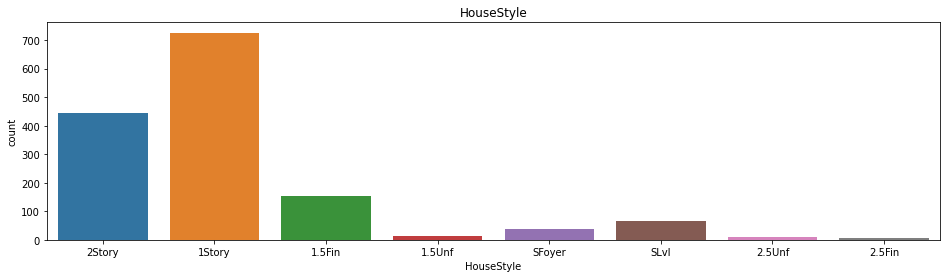

<Figure size 1152x288 with 0 Axes>

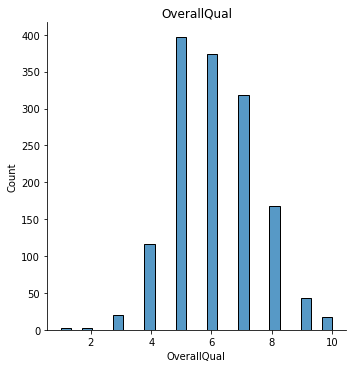

<Figure size 1152x288 with 0 Axes>

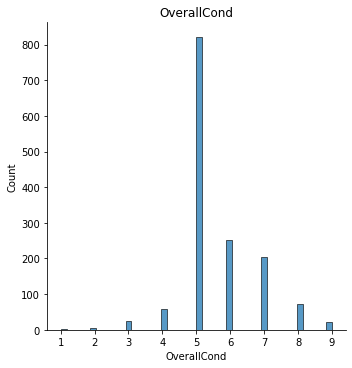

<Figure size 1152x288 with 0 Axes>

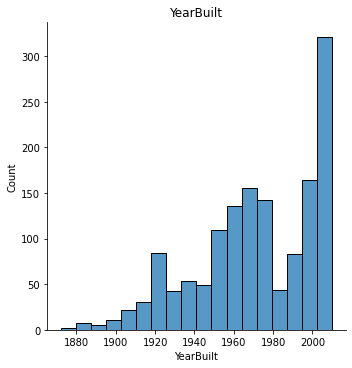

<Figure size 1152x288 with 0 Axes>

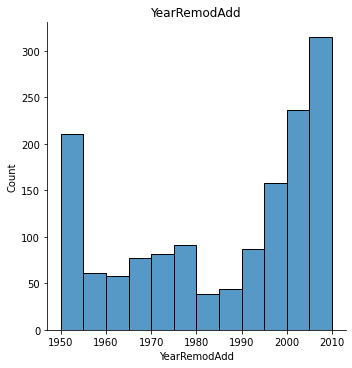

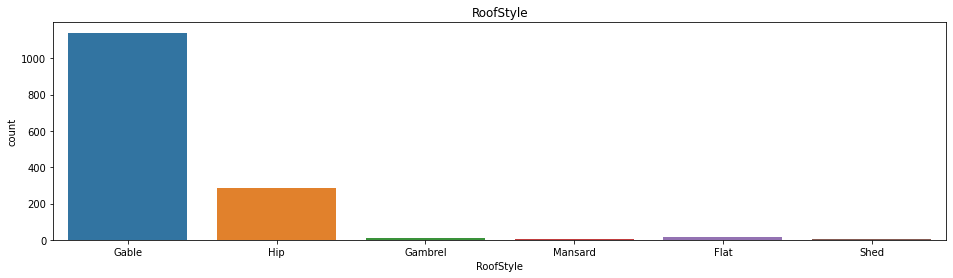

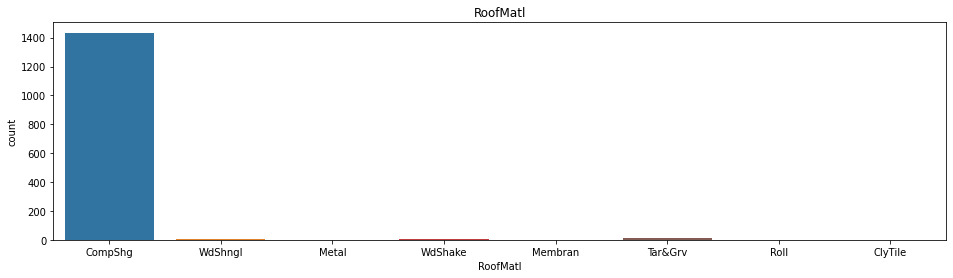

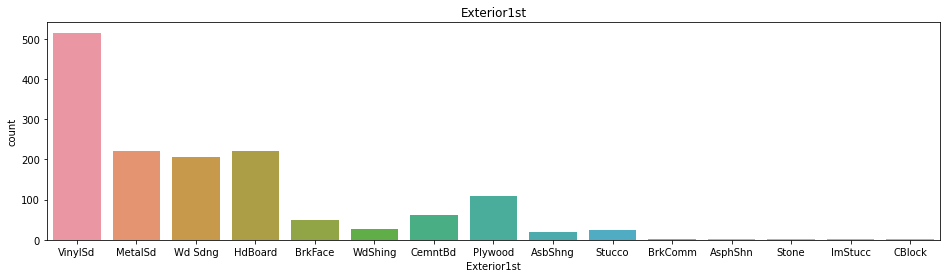

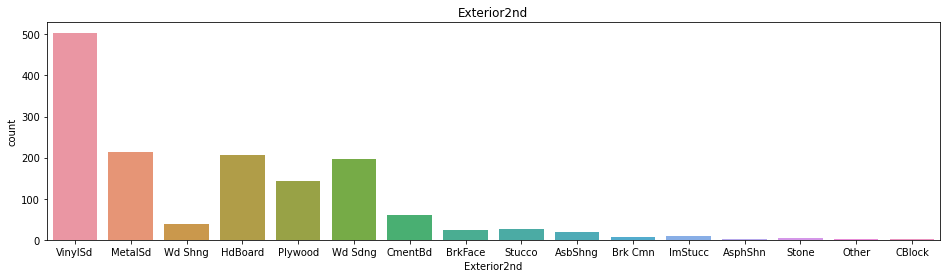

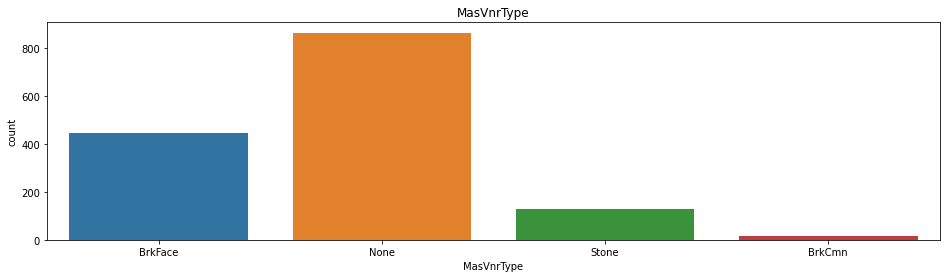

<Figure size 1152x288 with 0 Axes>

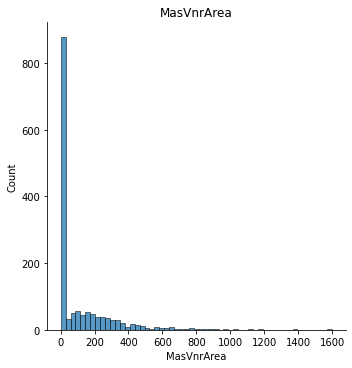

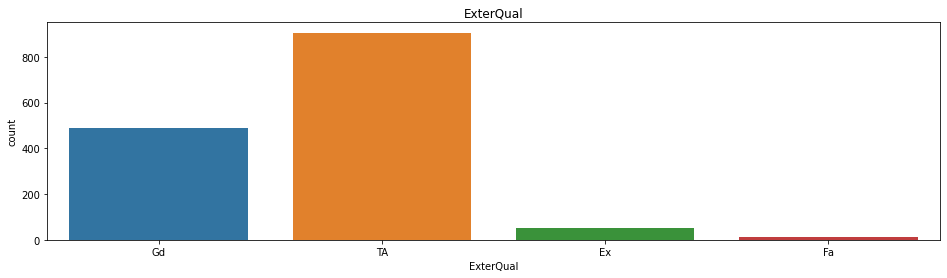

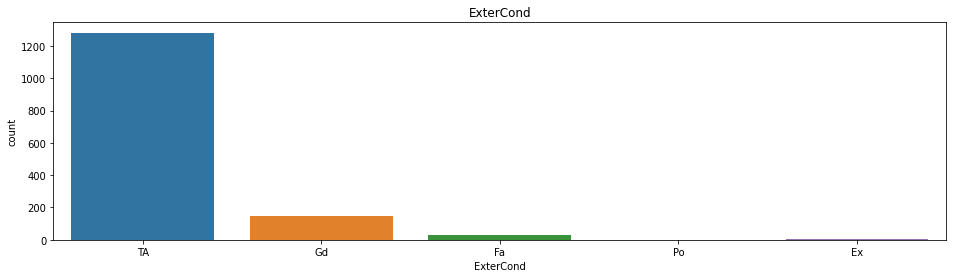

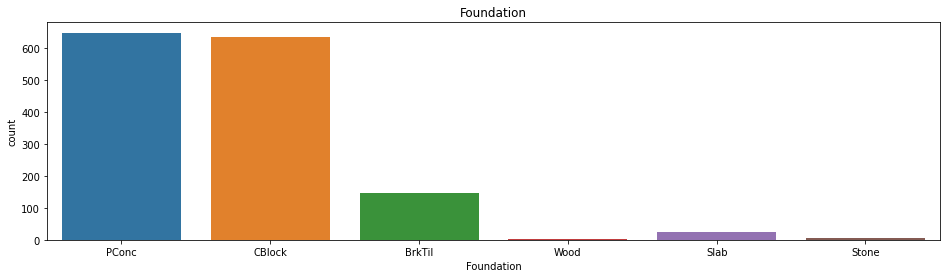

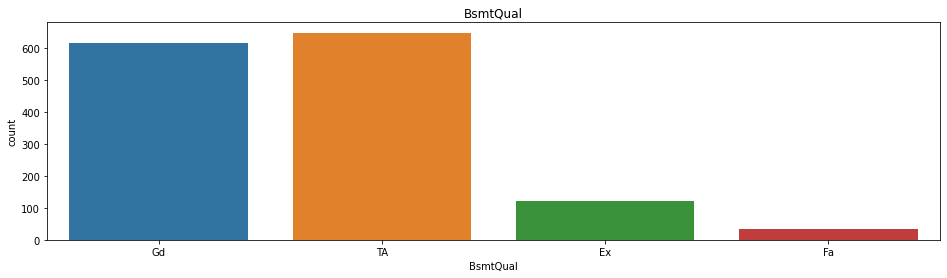

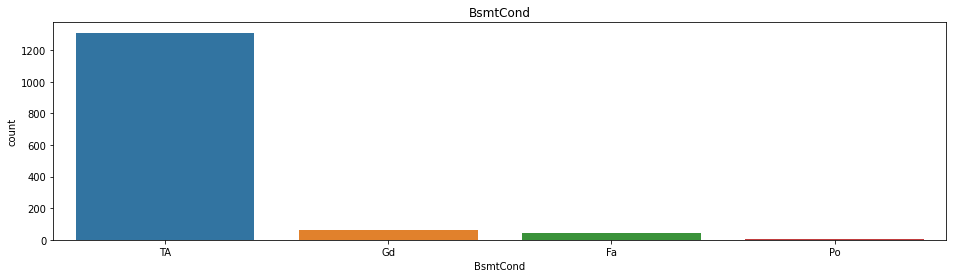

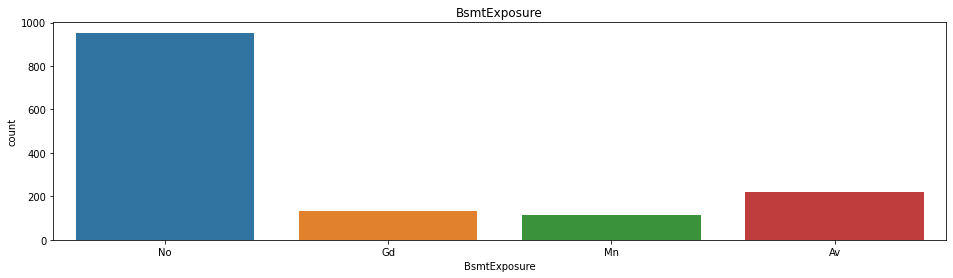

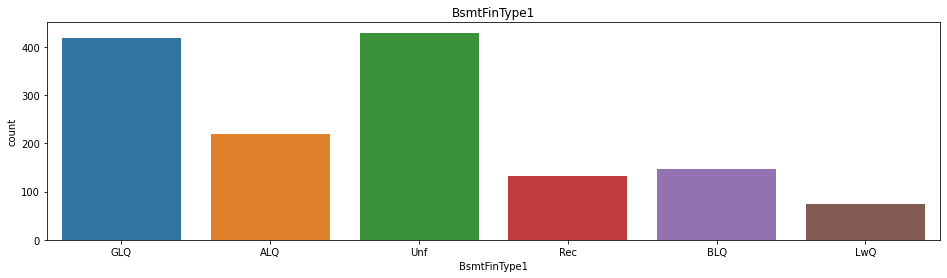

<Figure size 1152x288 with 0 Axes>

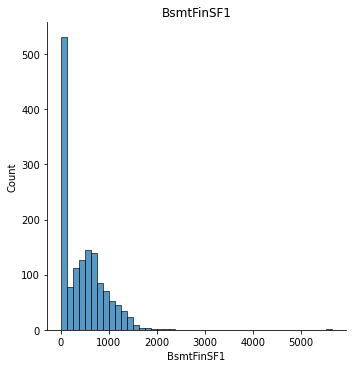

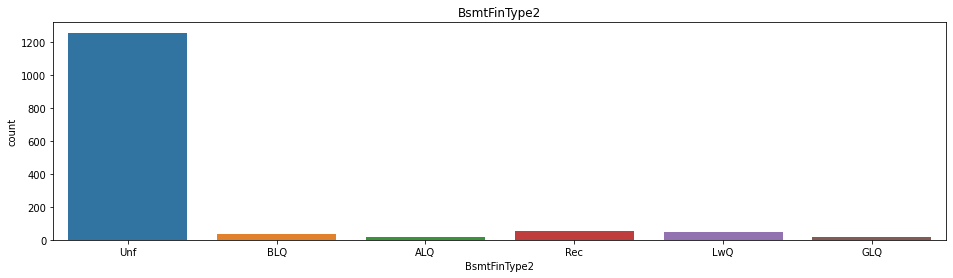

<Figure size 1152x288 with 0 Axes>

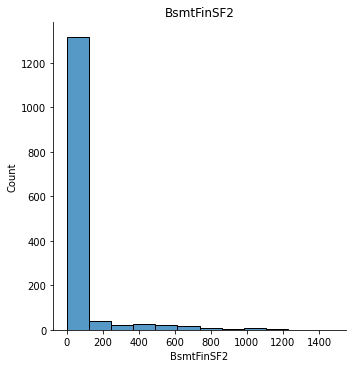

<Figure size 1152x288 with 0 Axes>

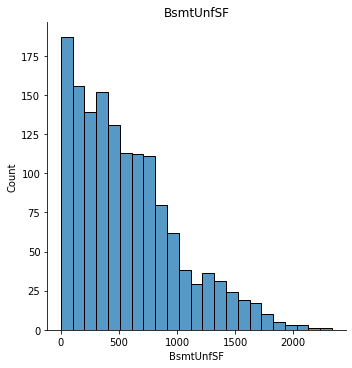

<Figure size 1152x288 with 0 Axes>

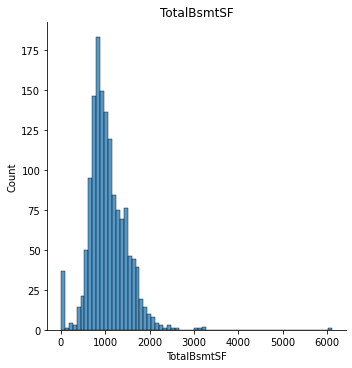

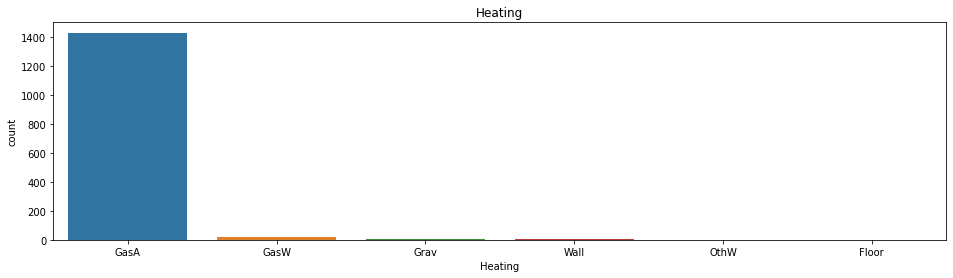

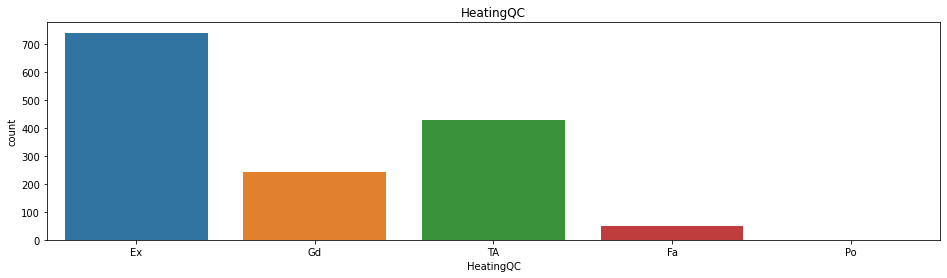

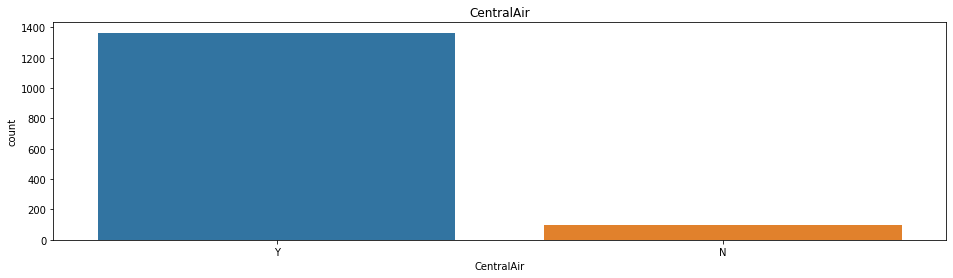

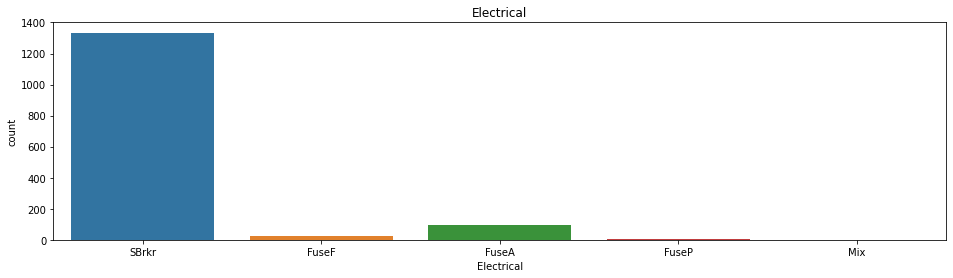

<Figure size 1152x288 with 0 Axes>

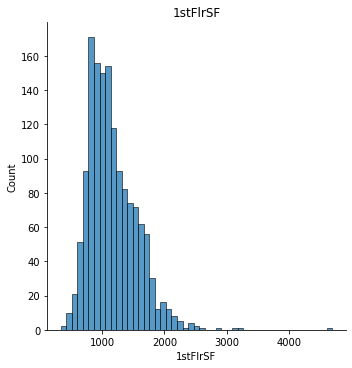

<Figure size 1152x288 with 0 Axes>

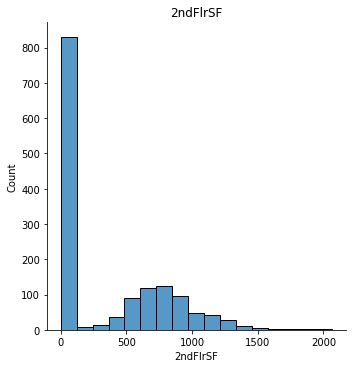

<Figure size 1152x288 with 0 Axes>

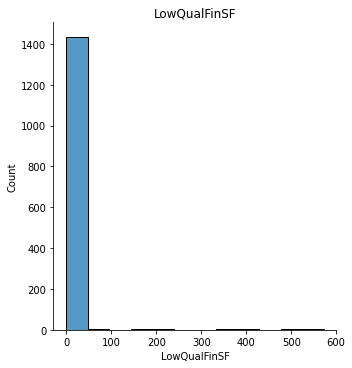

<Figure size 1152x288 with 0 Axes>

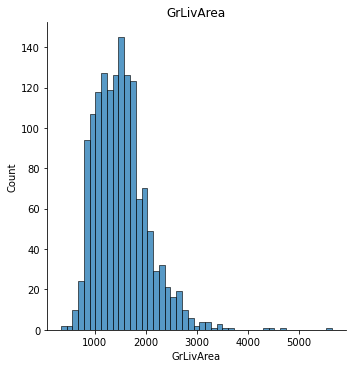

<Figure size 1152x288 with 0 Axes>

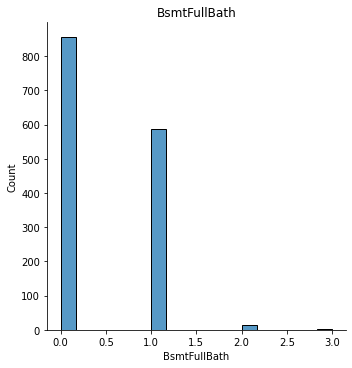

<Figure size 1152x288 with 0 Axes>

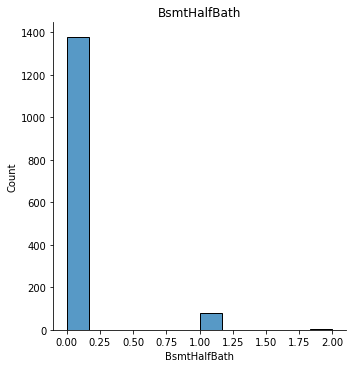

<Figure size 1152x288 with 0 Axes>

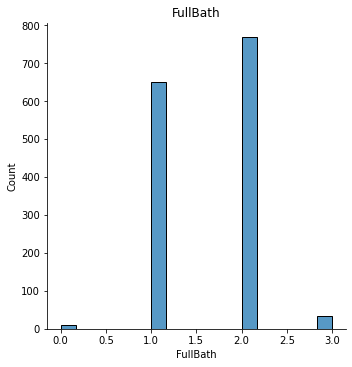

<Figure size 1152x288 with 0 Axes>

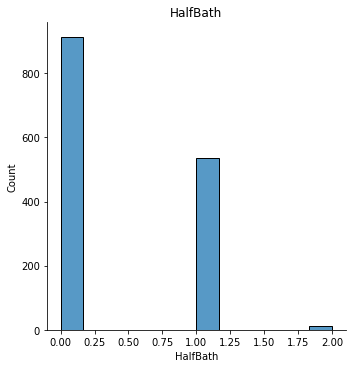

<Figure size 1152x288 with 0 Axes>

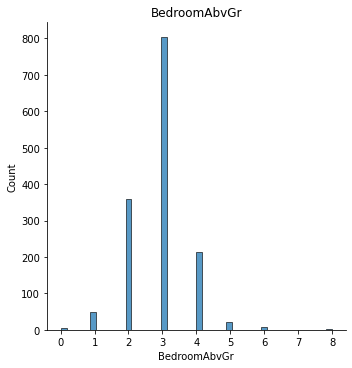

<Figure size 1152x288 with 0 Axes>

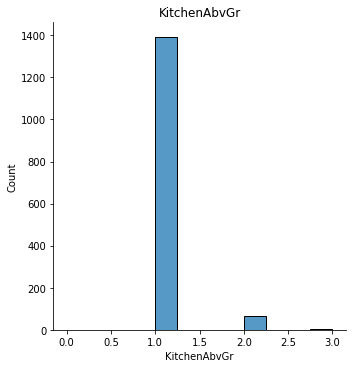

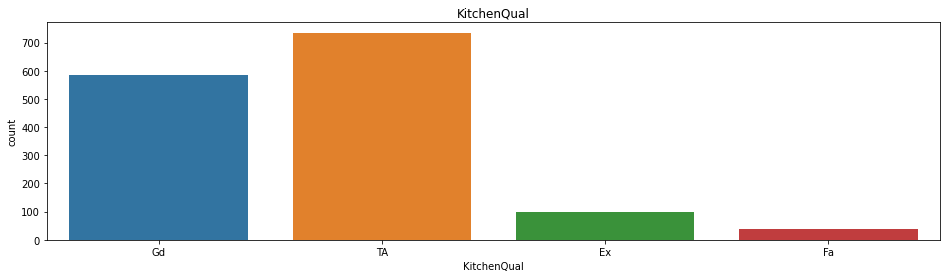

<Figure size 1152x288 with 0 Axes>

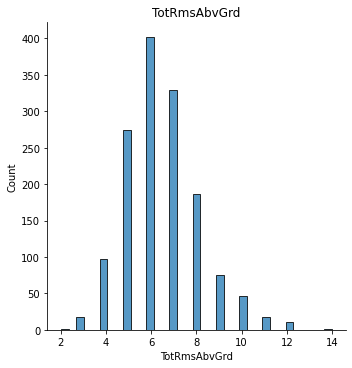

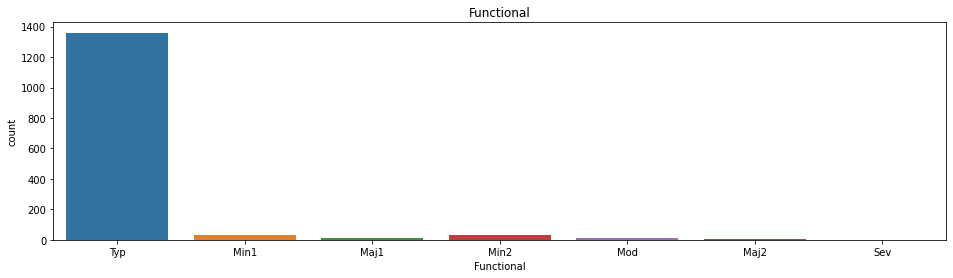

<Figure size 1152x288 with 0 Axes>

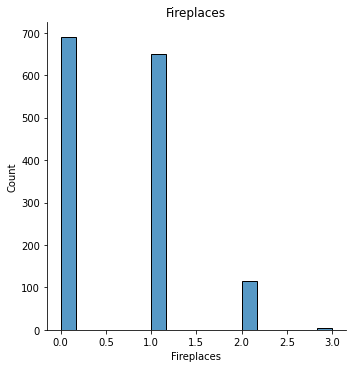

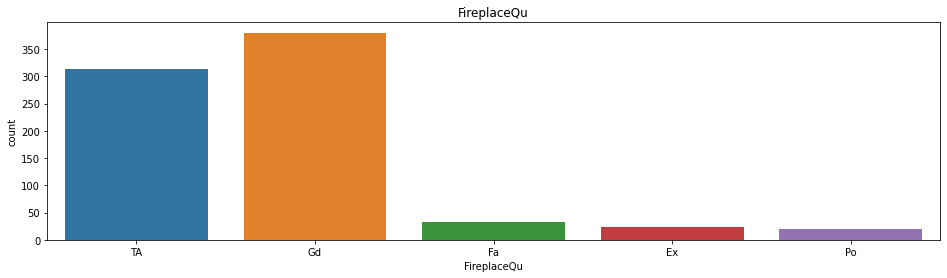

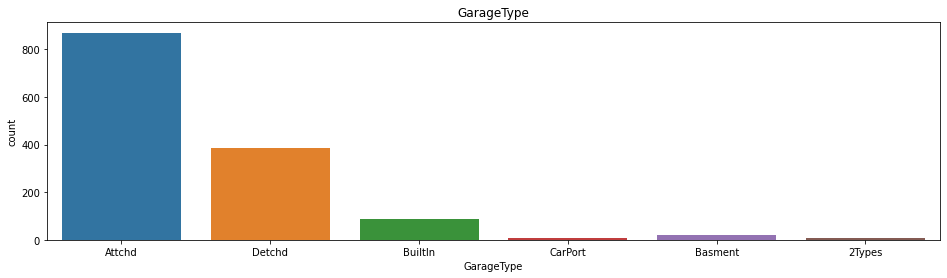

<Figure size 1152x288 with 0 Axes>

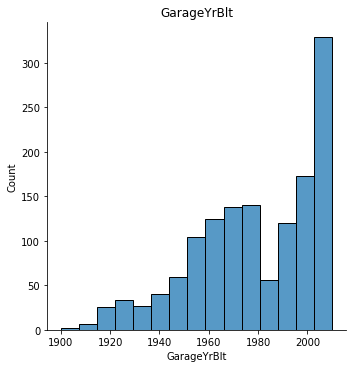

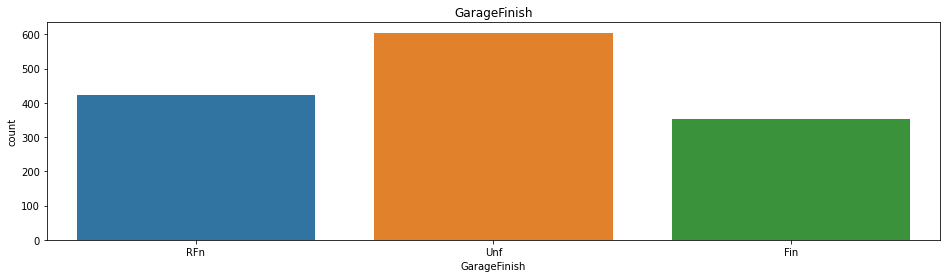

<Figure size 1152x288 with 0 Axes>

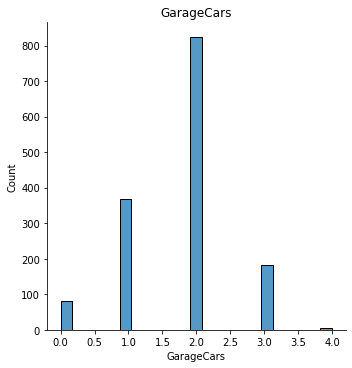

<Figure size 1152x288 with 0 Axes>

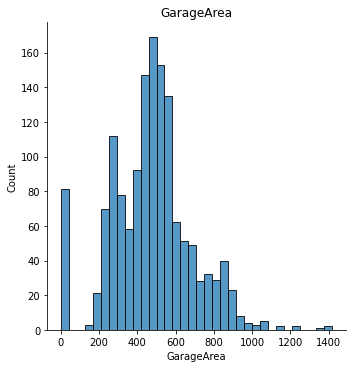

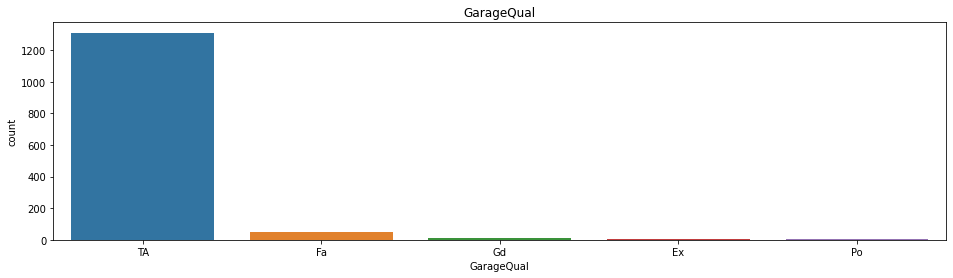

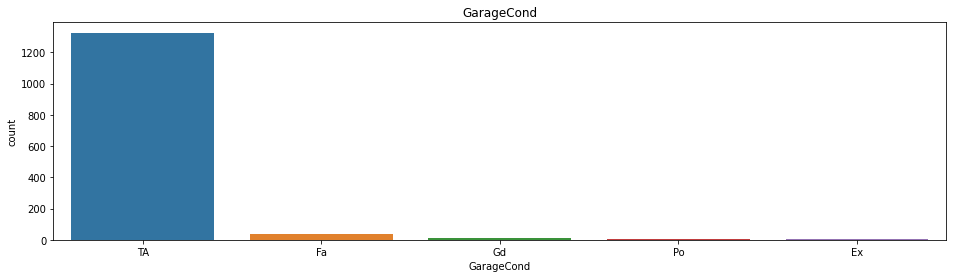

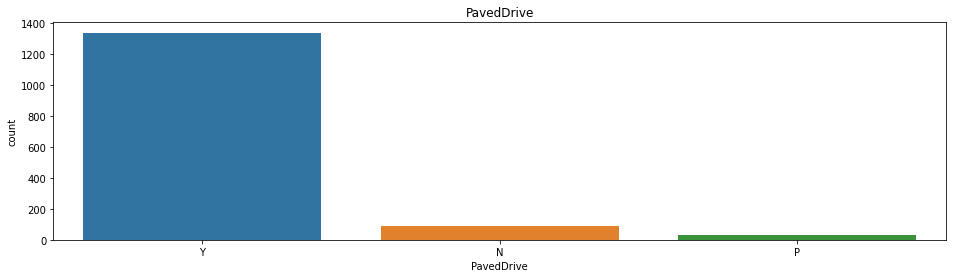

<Figure size 1152x288 with 0 Axes>

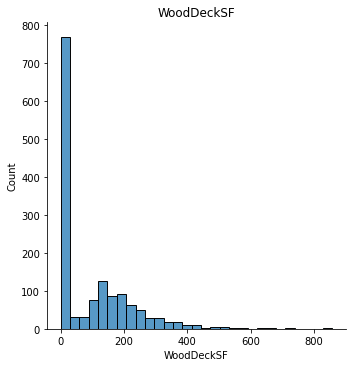

<Figure size 1152x288 with 0 Axes>

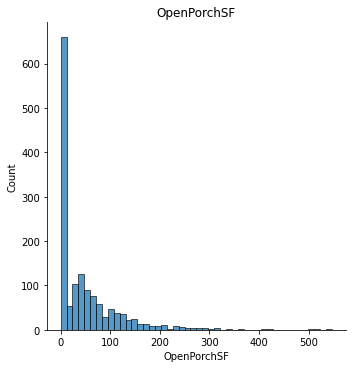

<Figure size 1152x288 with 0 Axes>

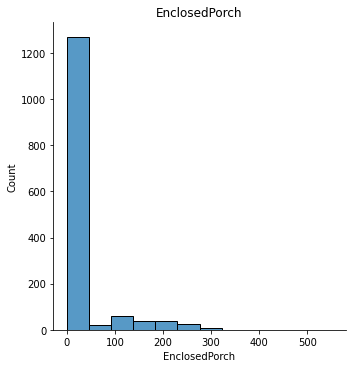

<Figure size 1152x288 with 0 Axes>

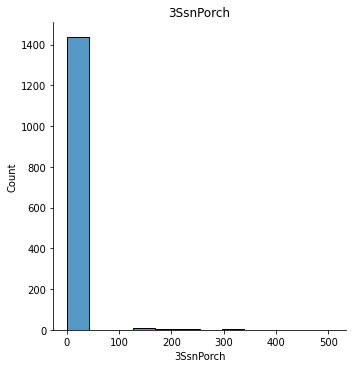

<Figure size 1152x288 with 0 Axes>

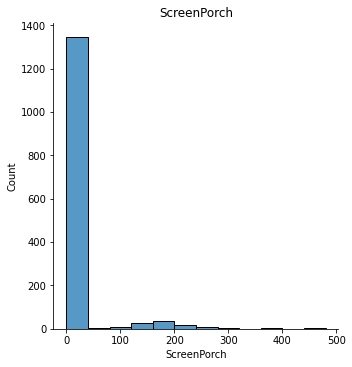

<Figure size 1152x288 with 0 Axes>

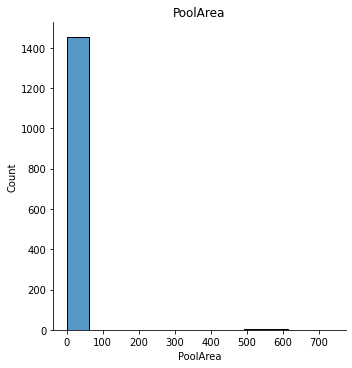

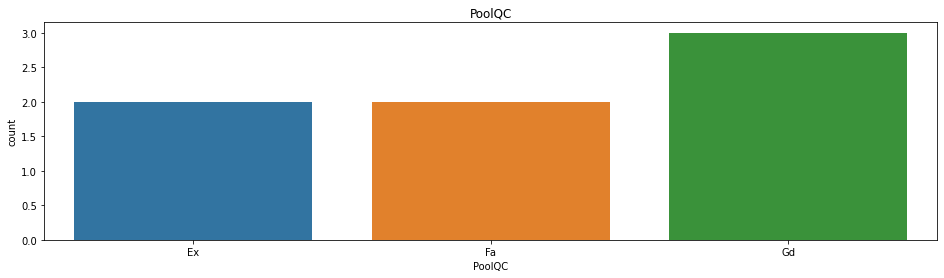

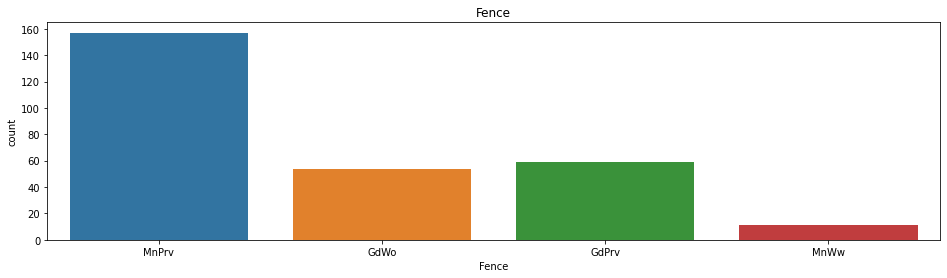

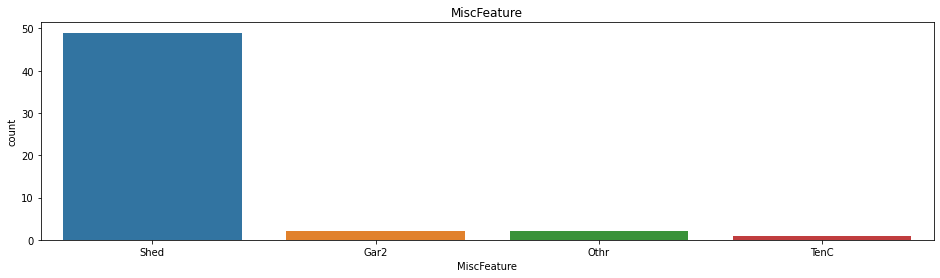

<Figure size 1152x288 with 0 Axes>

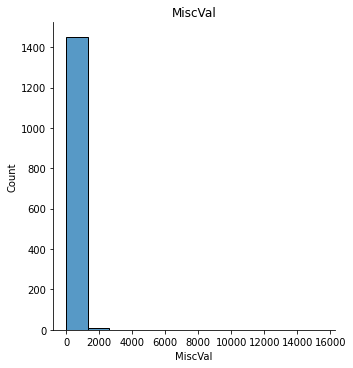

<Figure size 1152x288 with 0 Axes>

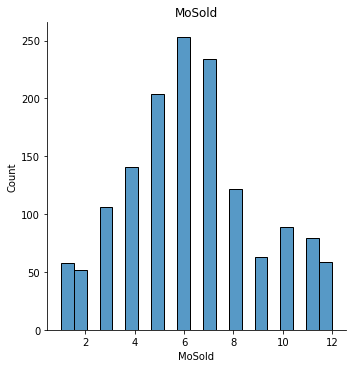

<Figure size 1152x288 with 0 Axes>

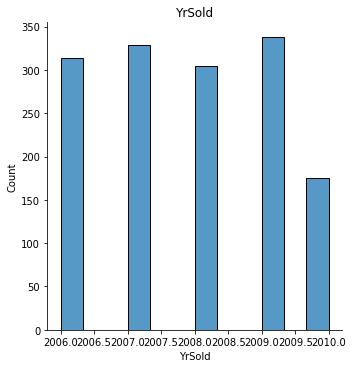

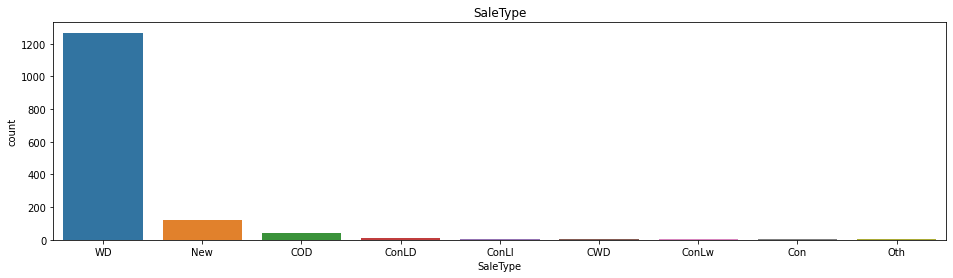

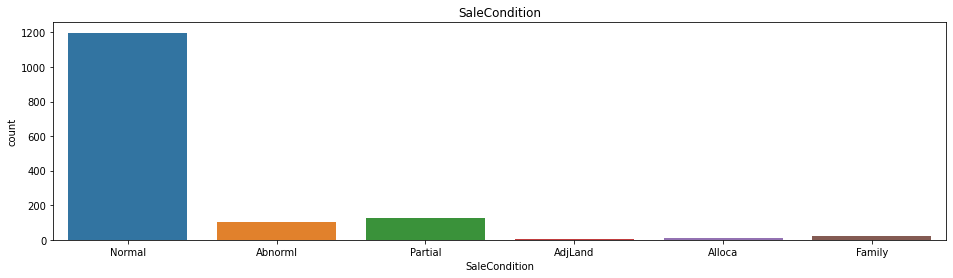

<Figure size 1152x288 with 0 Axes>

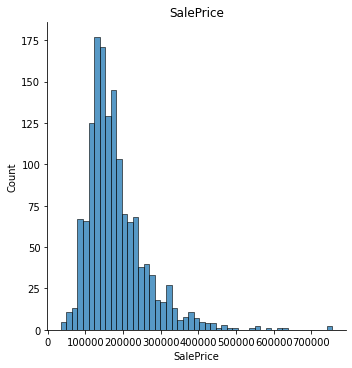

In [8]:
# plot distributions of features, countplot if object, displot if numeric
for feat in df.columns:
  plt.figure(figsize=(16,4))
  if df[feat].dtype == 'object':
    sns.countplot(data=df, x=feat) # for countplot must use data=
  else:
    sns.displot(df, x=feat)
  plt.title(feat)
  plt.show()

**Observations**

**Continuous Features**

+ SalesPrice outliers **Target**

*Outliers - clip*
+ MiscValue outliers right side, clip
+ PoolArea outliers right side, clip
+ OPenPorchSf outliers right side, clip
+ WoodDeck outliers right side, clip
+ GarageArea outliers right side, clip
+ GarageCars outliers right side, clip
+ Fireplace outliers right side, clip
+ TotRmsAbcGrd outliers right side, clip
+ KitchenAbvGrd outliers right and left side, clip
+ BedroomsAbvGrd outliers right and left side, clip
+ BsmtFullBath outliers right side, clip
+ GrLivArea outliers right side, clip
+ LowQualFinSF outliers right side, clip
+ 2ndFlrSF outliers right side, clip
+ 1stFlrSF outliers right side, clip
+ TotalBsmtSF outliers right side, clip
+ BsmtUnfSF outliers right side, clip
+ BsmtFinSF2 outliers right side, clip
+ BsmtFinSF1 outliers right side, clip
+ MasVnrArea outliers right side, clip
+ LotArea outliers right side, clip
+ LotFrontage outliers right side, clip
+ MSubClass outliers right side, clip

*Outliers - Bucketize*
+ ScreenPorch outliers right side, bucketize
+ 3SsnPorch outliers right side, bucketize
+ EncolsedPorch outliers right side, bucketize
+ GarageYrBuilt outliers right side, bucketize
+ YearRemodelAdd outliers right side, bucketize
+ YearBuilt outliers left side, bucketize
+ OverallCond outliers left side, bucketize

**Category Features**

*Dimensionality Reduction*
+ SaleCondition has 4 categories, reduce
+ MiscFeatures has 4 categories, reduce
+ PavedDrive has 3 categories, reduce
+ GarageCond has 5 categories, reduce
+ GarageQual has 5 categories, reduce
+ GarageType has 7 categories, reduce
+ FireplaceQu has 5 categories, reduce
+ Functional has 7 categories, reduce
+ Electrical has 5 categories, reduce
+ HeatingQC has 5 categories, reduce
+ Heating has 6 categories, reduce
+ BsmtFinType2 6 categories, reduce
+ BsmtFinType1 6 categories, reduce
+ Foundation 6 categories, reduce
+ ExterCond 6 categories, reduce
+ Exterior1st 15 categories, reduce
+ Exterior2nd 15 categories, reduce
+ RoofMatl 7 categories, reduce
+ RoofStyle 7 categories, reduce
+ HouseStyle 7 categories, reduce
+ BldStyle 7 categories, reduce
+ Condition1 9 categories, reduce
+ Condition2 8 categories, reduce
+ Neighborhood 8 categories, reduce
+ Landslope 3 imbalanced categories, reduce
+ LotConfig 3 imbalanced categories, reduce
+ LotShape 4 imbalanced categories, reduce
+ MSZoning 4 imbalanced categories, reduce

**High Imbalance**
+ Ultilies almost complete imbalance, is feature valuable?
+ Street almost complete imbalance, is feature valuable?
+ BsmtHalfBath high imabalance, is feature valuable?

## Bivariate Analysis

## Correlation Target and Continuous

In [9]:
# corrwith of SalePrice don't forget to sort
df.corrwith(df['SalePrice']).sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
dtype: float

In [10]:
# select out only the features with less the .25 positive or negative correlation and sort
df.corrwith(df['SalePrice'])[(df.corrwith(df['SalePrice'])>-.25) & (df.corrwith(df['SalePrice'])<.25)].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
dtype: float64

In [11]:
# only where correlations are above .6 positive or negative
df.corrwith(df['SalePrice'])[(df.corrwith(df['SalePrice'])<-.6) | (df.corrwith(df['SalePrice'])>.6)].sort_values()

1stFlrSF       0.605852
TotalBsmtSF    0.613581
GarageArea     0.623431
GarageCars     0.640409
GrLivArea      0.708624
OverallQual    0.790982
SalePrice      1.000000
dtype: float64

**Observations**

*less than 5% correlation with target.*
+ LowQualFinSF, 
+ ID
+ MiscVal
+ BsmtHalfBath
+ BsmtFinSf2
+ 3SsnPorch
+ MoSold 

*less than 10%
+ PooArea
+ OverallCond

*high correlation*
+ 1stFloorSF
+ TotalBsmtSF
+ GarageArea
+ GarageCars
+ GrLivArea
+ OverallQual

# Preprocessing

## Bucketize Continuous

*Outliers - Bucketize*
+ ScreenPorch outliers right side, bucketize
+ 3SsnPorch outliers right side, bucketize
+ EncolsedPorch outliers right side, bucketize
+ GarageYrBuilt outliers right side, bucketize
+ YearRemodelAdd outliers right side, bucketize
+ YearBuilt outliers left side, bucketize
+ OverallCond outliers left side, bucketize

### ScreenPorch

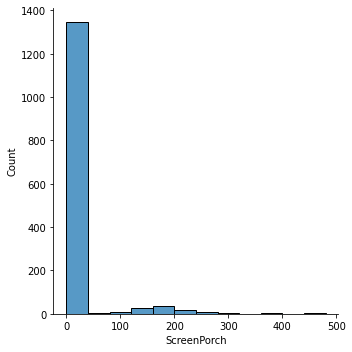

In [12]:
# displot of ScreenPorch
sns.displot(df, x='ScreenPorch')

In [13]:
# bucketize ScreenPorch into bins by -1,200,510 into buckets 'A','B'
df['ScreenPorch'] = pd.cut(df['ScreenPorch'], bins=[-1,200, 510], labels=['A','B'])
df_test['ScreenPorch'] = pd.cut(df_test['ScreenPorch'], bins=[-1,200, 510], labels=['A','B'])

### 3SsnPorch

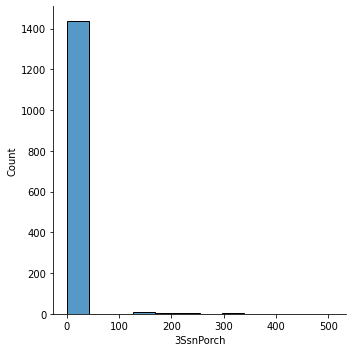

In [14]:
# displot of #3SsnPorch
sns.displot(df, x='3SsnPorch')

In [15]:
# bucketize 3SsnPorch into bins by -1,100,610 into categories 'A','B'
df['3SsnPorch'] = pd.cut(df['3SsnPorch'], bins=[-1,100,610], labels=['A','B'])
df_test['3SsnPorch'] = pd.cut(df_test['3SsnPorch'], bins=[-1,100,610], labels=['A','B'])

### EncolsedPorch

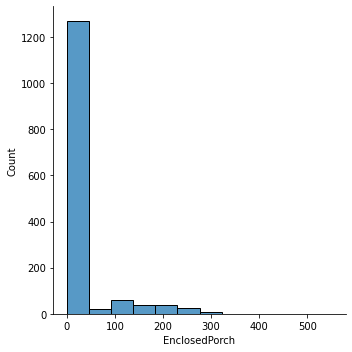

In [16]:
sns.displot(df, x='EnclosedPorch')

In [17]:
df['EnclosedPorch'] = pd.cut(df['EnclosedPorch'], bins=[-1,125,600], labels=['A','B'])
df_test['EnclosedPorch'] = pd.cut(df_test['EnclosedPorch'], bins=[-1,125,600], labels=['A','B'])

### GarageYearBuilt

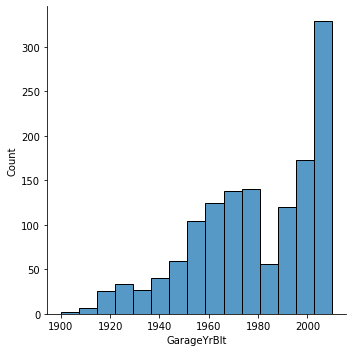

In [18]:
sns.displot(df, x='GarageYrBlt')

In [19]:
df['GarageYrBlt'] = pd.cut(df['GarageYrBlt'], bins=[0,1940,1965,2000,2020], labels=['A','B','C','D'])
df_test['GarageYrBlt'] = pd.cut(df_test['GarageYrBlt'], bins=[0,1940,1965,2000,2020], labels=['A','B','C','D'])

### YearRemodAdd

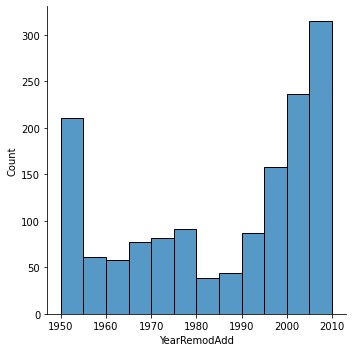

In [20]:
sns.displot(df, x='YearRemodAdd')

In [21]:
df['YearRemodAdd'] = pd.cut(df['YearRemodAdd'], bins=[1940,1965,1995,2020], labels=['A','B','C'])
df_test['YearRemodAdd'] = pd.cut(df_test['YearRemodAdd'], bins=[1940,1965,1995,2020], labels=['A','B','C'])

### YearBuilt

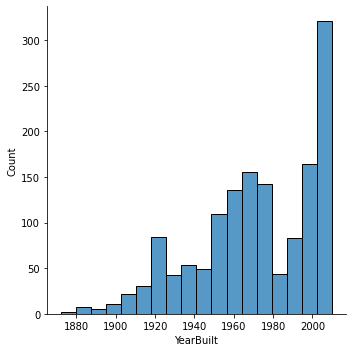

In [22]:
sns.displot(df, x='YearBuilt')

In [23]:
df['YearBuilt'] = pd.cut(df['YearBuilt'], bins=[0,1940,1965,1985,2020], labels=['A','B','C','D'])
df_test['YearBuilt'] = pd.cut(df_test['YearBuilt'], bins=[0,1940,1965,1985,2020], labels=['A','B','C','D'])

### OverallCond

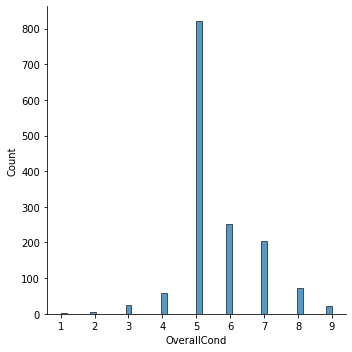

In [24]:
sns.displot(df, x='OverallCond')

In [25]:
df['OverallCond'] = pd.cut(df['OverallCond'], bins=[0,4,7,10], labels=['A','B','C'])
df_test['OverallCond'] = pd.cut(df_test['OverallCond'], bins=[0,4,7,10], labels=['A','B','C'])

### YrSold

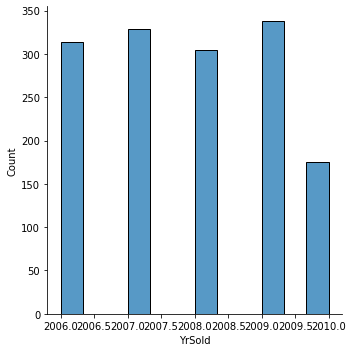

In [26]:
sns.displot(df, x='YrSold')

In [27]:
df['YrSold'] = pd.cut(df['YrSold'], bins=[0,2008,2009,2011], labels=['A','B','C'])
df_test['YrSold'] = pd.cut(df_test['YrSold'], bins=[0,2008,2009,2011], labels=['A','B','C'])

### MoSold

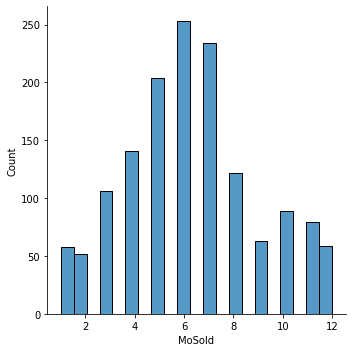

In [28]:
sns.displot(df, x='MoSold')

In [29]:
df['MoSold'] = pd.cut(df['MoSold'], bins=[-1,3,6,9,113], labels=['A','B','C', 'D'])
df_test['MoSold'] = pd.cut(df_test['MoSold'], bins=[-1,3,6,9,113], labels=['A','B','C', 'D'])

## Dimensioniality Reduction

Because we will be using these categories to make one hot encoded features the goal here is to reduce as much as possible the number of categories in each feature.  

*Dimensionality Reduction*
+ SaleCondition has 4 categories, reduce
+ MiscFeatures has 4 categories, reduce
+ PavedDrive has 3 categories, reduce
+ GarageCond has 5 categories, reduce
+ GarageQual has 5 categories, reduce
+ GarageType has 7 categories, reduce
+ FireplaceQu has 5 categories, reduce
+ Functional has 7 categories, reduce
+ Electrical has 5 categories, reduce
+ HeatingQC has 5 categories, reduce
+ Heating has 6 categories, reduce
+ BsmtFinType2 6 categories, reduce
+ BsmtFinType1 6 categories, reduce
+ Foundation 6 categories, reduce
+ ExterCond 6 categories, reduce
+ Exterior1st 15 categories, reduce
+ Exterior2nd 15 categories, reduce
+ RoofMatl 7 categories, reduce
+ RoofStyle 7 categories, reduce
+ HouseStyle 7 categories, reduce
+ BldStyle 7 categories, reduce
+ Condition1 9 categories, reduce
+ Condition2 8 categories, reduce
+ Neighborhood 8 categories, reduce
+ Landslope 3 imbalanced categories, reduce
+ LotConfig 3 imbalanced categories, reduce
+ LotShape 4 imbalanced categories, reduce
+ MSZoning 4 imbalanced categories, reduce

### SaleCondition

In [30]:
# value counts
df['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [31]:
# replace family alloca adj with Abnormal for df and df_test
df['SaleCondition'].replace(['Family', 'Alloca','AdjLand'], 'Abnorml', inplace=True)
df_test['SaleCondition'].replace(['Family', 'Alloca','AdjLand'], 'Abnorml', inplace=True)

### MiscFeature

In [32]:
# value counts
df['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

** DON'T USE MiscFeature**

### PavedDrive

In [33]:
# value counts
df['PavedDrive'].value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [34]:
#  change P into N
df['PavedDrive'].replace(['P'], 'N', inplace=True)
df_test['PavedDrive'].replace(['P'], 'N', inplace=True)

### GarageCond

In [35]:
df['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [36]:
df['GarageCond'].replace(['Ex', 'Po','Gd'], 'Fa', inplace=True)
df_test['GarageCond'].replace(['Ex', 'Po','Gd'], 'Fa', inplace=True)

### GarageQual 

In [37]:
df['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [38]:
df['GarageQual'].replace(['Po', 'Ex','Gd'], 'Fa', inplace=True)
df_test['GarageQual'].replace(['Po', 'Ex','Gd'], 'Fa', inplace=True)

### GarageType

In [39]:
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [40]:
df['GarageType'].replace(['2Types', 'CarPort','Basment'], 'BuiltIn', inplace=True)
df_test['GarageType'].replace(['2Types', 'CarPort','Basment'], 'BuiltIn', inplace=True)

### FireplaceQu

In [41]:
df['SaleCondition'].value_counts()

Normal     1198
Abnorml     137
Partial     125
Name: SaleCondition, dtype: int64

In [42]:
df['SaleCondition'].replace(['Family', 'Alloca','AdjLand'], 'Abnormal', inplace=True)
df_test['SaleCondition'].replace(['Family', 'Alloca','AdjLand'], 'Abnormal', inplace=True)

### Functional

In [43]:
df['Functional'].value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [44]:
df['Functional'].replace(['Sev', 'Maj2','Maj1', 'Mod', 'Min1', 'Min2'], 'Other', inplace=True)
df_test['Functional'].replace(['Sev', 'Maj2','Maj1', 'Mod', 'Min1', 'Min2'], 'Other', inplace=True)

### Electrical

In [45]:
df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [46]:
df['Electrical'].replace(['FuseF', 'FuseP','Mix'], 'FuseA', inplace=True)
df_test['Electrical'].replace(['FuseF', 'FuseP','Mix'], 'FuseA', inplace=True)

### HeatingQC

In [47]:
df['SaleCondition'].value_counts()

Normal     1198
Abnorml     137
Partial     125
Name: SaleCondition, dtype: int64

In [48]:
df['SaleCondition'].replace(['Family', 'Alloca','AdjLand'], 'Abnormal', inplace=True)
df_test['SaleCondition'].replace(['Family', 'Alloca','AdjLand'], 'Abnormal', inplace=True)

### Heating

In [49]:
df['Heating'].value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [50]:
df['Heating'].replace(['Floor', 'OthW','Wall', 'Grav', 'GasW'], 'other', inplace=True)
df_test['Heating'].replace(['Floor', 'OthW','Wall', 'Grav', 'GasW'], 'other', inplace=True)

### BsmtQual

In [51]:
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [52]:
df['BsmtQual'].replace(['Fa'], 'Ex', inplace=True)
df_test['BsmtQual'].replace(['Fa'], 'Ex', inplace=True)

### BsmtCond

In [53]:
df['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [54]:
df['BsmtCond'].replace(['Fa', 'Po'], 'Gd', inplace=True)
df_test['BsmtCond'].replace(['Fa', 'Po'], 'Gd', inplace=True)

### BsmtFinType2

In [55]:
df['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [56]:
df['BsmtFinType2'].replace(['Rec', 'LwQ','BLQ', 'ALQ', 'GLQ'], 'other', inplace=True)
df_test['BsmtFinType2'].replace(['Rec', 'LwQ','BLQ', 'ALQ', 'GLQ'], 'other', inplace=True)

### BsmtFinType1

BsmtFinType2: Rating of basement finished area (if multiple types)

+ GLQ	Good Living Quarters
+ ALQ	Average Living Quarters
+ BLQ	Below Average Living Quarters	
+ Rec	Average Rec Room
+ LwQ	Low Quality
+ Unf	Unfinshed
+ NA	No Basement

In [57]:
df['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [58]:
df['BsmtFinType1'].replace(['Unf', 'BLQ','LwQ'], 'low', inplace=True)
df_test['BsmtFinType1'].replace(['Rec', 'ALQ','GLQ'], 'avg', inplace=True)

### Foundation

In [59]:
df['Foundation'].value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [60]:
df['Foundation'].replace(['Slab', 'Stone','Wood'], 'BrkTil', inplace=True)
df_test['Foundation'].replace(['Slab', 'Stone','Wood'], 'BrkTil', inplace=True)

### ExterCond

In [61]:
df['ExterCond'].value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [62]:
df['ExterCond'].replace(['Fa', 'Ex','Po'], 'Gd', inplace=True)
df_test['ExterCond'].replace(['Fa', 'Ex','Po'], 'Gd', inplace=True)

### Exterior1st

In [63]:
df['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [64]:
df['Exterior1st'].replace(['CBlock', 'ImStucc','AsphShn',
                           'Stone', 'BrkComm', 'BrkFace'], 'CemntBd', inplace=True)
df['Exterior1st'].replace(['AsbShng', 'Stucco','WdShing',
                           'Wd Sdng', 'MetalSd', 'HdBoard'], 'VinylSd', inplace=True)

df_test['Exterior1st'].replace(['CBlock', 'ImStucc','AsphShn',
                           'Stone', 'BrkComm', 'BrkFace'], 'CemntBd', inplace=True)
df_test['Exterior1st'].replace(['AsbShng', 'Stucco','WdShing',
                           'Wd Sdng', 'MetalSd', 'HdBoard'], 'VinylSd', inplace=True)

### Exterior2nd

In [65]:
df['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [66]:
df['Exterior2nd'].replace(['CBlock', 'ImStucc','AsphShn',
                           'Stone', 'BrkComm', 'BrkFace',
                           'Brk Cmn','CmentBd'], 'CemntBd', inplace=True)
df['Exterior2nd'].replace(['AsbShng', 'Stucco','WdShing',
                           'Wd Sdng', 'MetalSd', 'HdBoard',
                           'Wd Shng', 'Other'], 'VinylSd', inplace=True)

df_test['Exterior2nd'].replace(['CBlock', 'ImStucc','AsphShn',
                           'Stone', 'BrkComm', 'BrkFace',
                           'Brk Cmn','CmentBd'], 'CemntBd', inplace=True)
df_test['Exterior2nd'].replace(['AsbShng', 'Stucco','WdShing',
                           'Wd Sdng', 'MetalSd', 'HdBoard',
                           'Wd Shng', 'Other'], 'VinylSd', inplace=True)

### RoofMatl

In [67]:
df['RoofMatl'].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

In [68]:
df['RoofMatl'].replace(['Family', 'Alloca','AdjLand'], 'Abnormal', inplace=True)
df_test['RoofMatl'].replace(['Family', 'Alloca','AdjLand'], 'Abnormal', inplace=True)

### HouseStyle

In [69]:
df['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [70]:
df['HouseStyle'].replace(['SLvl', 'SFoyer','1.5Unf',
                          '2.5Unf', '2.5Fin'], '1.5Fin', inplace=True)
df_test['HouseStyle'].replace(['SLvl', 'SFoyer','1.5Unf',
                          '2.5Unf', '2.5Fin'], '1.5Fin', inplace=True)

### BldgType

In [71]:
df['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [72]:
df['BldgType'].replace(['2fmCon', 'Twnhs','Duplex'], 'TwnhsE', inplace=True)
df_test['BldgType'].replace(['2fmCon', 'Twnhs','Duplex'], 'TwnhsE', inplace=True)

### Condition1

In [73]:
df['Condition1'].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [74]:
df['Condition1'].replace(['RRNe', 'RRNn','PosA',
                          'RRAe', 'PosN', 'RRAn',
                          'Artery', 'Feedr'], 'Abnormal', inplace=True)
df_test['Condition1'].replace(['RRNe', 'RRNn','PosA',
                          'RRAe', 'PosN', 'RRAn',
                          'Artery', 'Feedr'], 'Abnormal', inplace=True)

### Condition2

In [75]:
df['Condition2'].value_counts()

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

In [76]:
df['Condition2'].replace(['Family', 'Alloca','AdjLand'], 'Abnormal', inplace=True)
df_test['Condition2'].replace(['Family', 'Alloca','AdjLand'], 'Abnormal', inplace=True)

### Neighborhood

In [77]:
df['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [78]:
# df['Neighborhood'].replace(['Family', 'Alloca','AdjLand'], 'Abnormal', inplace=True)

### LandSlope

In [79]:
df['LandSlope'].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [80]:
df['LandSlope'].replace(['Sev'], 'Mod', inplace=True)
df_test['LandSlope'].replace(['Sev'], 'Mod', inplace=True)

### LotConfig

In [81]:
df['LotConfig'].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [82]:
df['LotConfig'].replace(['FR3', 'FR2'], 'CulDSac', inplace=True)
df_test['LotConfig'].replace(['FR3', 'FR2'], 'CulDSac', inplace=True)

### LotShape

In [83]:
df['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [84]:
df['LotShape'].replace(['IR2', 'IR3'], 'IR1', inplace=True)
df_test['LotShape'].replace(['IR2', 'IR3'], 'IR1', inplace=True)

### MSZoning

In [85]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [86]:
df['MSZoning'].replace(['C (all)', 'RH','FV'], 'RM', inplace=True)
df_test['MSZoning'].replace(['C (all)', 'RH','FV'], 'RM', inplace=True)

### MasVnrType

In [87]:
df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [88]:
df['MasVnrType'].replace(['BrkCmn', 'Stone'], 'BrkFace', inplace=True)
df_test['MasVnrType'].replace(['BrkCmn', 'Stone'], 'BrkFace', inplace=True)

In [89]:
df['MasVnrType'].value_counts()

None       864
BrkFace    588
Name: MasVnrType, dtype: int64

## Filling Null Values

Our models won't except null values so they need to be filled with a place holder to preserve the use of the rest of the data in the row.  It was generally assumed the null values did in fact represent a value of no existent.  With this and our goal to reduce the number of one hot encoded features we generally included them in the combination of the small groups into one category as it seems that fit better with the actual reasoning for null values. 

### GarageCond

In [90]:
# value counts
df['GarageCond'].value_counts()

TA    1326
Fa      53
Name: GarageCond, dtype: int64

In [91]:
# fill nulls inplace of train and test
df['GarageCond'].fillna('Fa', inplace=True)
df_test['GarageCond'].fillna('Fa', inplace=True)

### GarageQual

In [92]:
# value counts
df['GarageQual'].value_counts()

TA    1311
Fa      68
Name: GarageQual, dtype: int64

In [93]:
# fill nulls inplace of train and test
df['GarageQual'].fillna('Fa', inplace=True)
df_test['GarageQual'].fillna('Fa', inplace=True)

### GarageFinish

In [94]:
df['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [95]:
df['GarageQual'].fillna('Fin', inplace=True)
df_test['GarageQual'].fillna('Fin', inplace=True)

### GarageYrBlt

In [96]:
df['GarageYrBlt'].value_counts()

C    581
D    375
B    300
A    123
Name: GarageYrBlt, dtype: int64

In [97]:
df['GarageYrBlt'].fillna('A', inplace=True)
df_test['GarageYrBlt'].fillna('A', inplace=True)

### GarageType

In [98]:
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn    122
Name: GarageType, dtype: int64

In [99]:
df['GarageType'].fillna('BuiltIn', inplace=True)
df_test['GarageType'].fillna('BuiltIn', inplace=True)

### Electrical

In [100]:
df['Electrical'].value_counts()

SBrkr    1334
FuseA     125
Name: Electrical, dtype: int64

In [101]:
df['Electrical'].fillna('SBrkr', inplace=True)
df_test['Electrical'].fillna('SBrkr', inplace=True)

### BsmtFinType2

In [102]:
df['BsmtFinType2'].value_counts()

Unf      1256
other     166
Name: BsmtFinType2, dtype: int64

In [103]:
df['BsmtFinType2'].fillna('Unf', inplace=True)
df_test['BsmtFinType2'].fillna('Unf', inplace=True)

### BsmtFinType1

In [104]:
df['BsmtFinType1'].value_counts()

low    652
GLQ    418
ALQ    220
Rec    133
Name: BsmtFinType1, dtype: int64

In [105]:
df['BsmtFinType1'].fillna('avg', inplace=True)
df_test['BsmtFinType1'].fillna('avg', inplace=True)

### BsmtExposure

In [106]:
df['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [107]:
df['BsmtExposure'].fillna('No', inplace=True)
df_test['BsmtExposure'].fillna('No', inplace=True)

### BsmtCond

In [108]:
df['BsmtCond'].value_counts()

TA    1311
Gd     112
Name: BsmtCond, dtype: int64

In [109]:
df['BsmtCond'].fillna('Gd', inplace=True)
df_test['BsmtCond'].fillna('Gd', inplace=True)

### BsmtQual

In [110]:
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    156
Name: BsmtQual, dtype: int64

In [111]:
df['BsmtQual'].fillna('Ex', inplace=True)
df_test['BsmtQual'].fillna('Ex', inplace=True)

## BsmtFullBath

In [112]:
df['BsmtFullBath'].value_counts()

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

In [113]:
df_test['BsmtFullBath'].fillna(0, inplace=True)

### MasVnrArea

In [114]:
df['MasVnrArea'].value_counts()

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [115]:
df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace=True)
df_test['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace=True)

### MasVnrType

In [116]:
df['MasVnrType'].value_counts()

None       864
BrkFace    588
Name: MasVnrType, dtype: int64

In [117]:
df['MasVnrType'].fillna('None', inplace=True)
df_test['MasVnrType'].fillna('None', inplace=True)

### LotFrontage

In [118]:
df['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [119]:
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)
df_test['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)

### GarageFinish

In [120]:
df['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [121]:
df['GarageFinish'].fillna('Unf', inplace=True)
df_test['GarageFinish'].fillna('Unf', inplace=True)

## One hot encoding - get dummies



In [122]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   object  
 3   LotFrontage    1460 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   object  
 6   Alley          91 non-null     object  
 7   LotShape       1460 non-null   object  
 8   LandContour    1460 non-null   object  
 9   Utilities      1460 non-null   object  
 10  LotConfig      1460 non-null   object  
 11  LandSlope      1460 non-null   object  
 12  Neighborhood   1460 non-null   object  
 13  Condition1     1460 non-null   object  
 14  Condition2     1460 non-null   object  
 15  BldgType       1460 non-null   object  
 16  HouseStyle     1460 non-null   object  
 17  OverallQual    1460 non-null   in

In [124]:
# num next to a feature represents a continuous feature
# noting them here will make the final feature selection easier
features_cat = [
                # 'MSSubClass',#num
                'MSZoning', #'LotFrontage', #'LotArea', num
                # 'Street',
                # 'Alley',
                'LotShape', 'LandContour', 'Utilities', 'LotConfig',
                'LandSlope',
                # 'Neighborhood', 
                'Condition1', 'Condition2', 'BldgType',
                'HouseStyle',#'OverallQual', # num
                'OverallCond', 'YearBuilt', 'YearRemodAdd',
                'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
                'BsmtCond', 'BsmtExposure', 'BsmtFinType1', #'BsmtFinSF1', #num
                'BsmtFinType2', #'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', # num
                # 'Heating',
                'HeatingQC', 'CentralAir', 'Electrical',# '1stFlrSF', '2ndFlrSF', #num
                # 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', #num
                'FullBath',
                # 'HalfBath', #num
                # 'BedroomAbvGr', #num
                # 'KitchenAbvGr',#num
                'KitchenQual',
                # 'TotRmsAbvGrd', #num
                'Functional', #'Fireplaces',#num
                # 'FireplaceQu',
                'GarageType',
                'GarageYrBlt', 'GarageFinish', 'GarageCars', # 'GarageArea', # num
                'GarageQual',
                'GarageCond', 'PavedDrive',
                #'WoodDeckSF', 'OpenPorchSF',# num
                'EnclosedPorch','3SsnPorch', 'ScreenPorch',
                # 'PoolArea',# num
                # 'PoolQC',
                #'Fence', 'MiscFeature', #'MiscVal',
                'MoSold', 'YrSold', 'SaleType',
                'SaleCondition'
                ]
target = ['SalePrice']

In [125]:
# get dummies of train and test
df = pd.get_dummies(df, columns=features_cat)
df_test = pd.get_dummies(df_test, columns=features_cat)

In [126]:
df.shape

(1460, 188)

# Modeling

## Features, Target

In [127]:
df.columns[20:60]

Index(['HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'SalePrice',
       'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR1', 'LotShape_Reg',
       'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low',
       'LandContour_Lvl', 'Utilities_AllPub', 'Utilities_NoSeWa',
       'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_Inside',
       'LandSlope_Gtl', 'LandSlope_Mod', 'Condition1_Abnormal',
       'Condition1_Norm', 'Condition2_Artery', 'Condition2_Feedr',
       'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN',
       'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn'],
      dtype='object')

In [128]:
# list of all features
features1 = [
                'MSSubClass','LotFrontage', 'LotArea', #num
                # 'Alley',
                # 'Neighborhood', 
                'OverallQual','BsmtFinSF1', #num
                 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', # num
                # 'Heating',
                '1stFlrSF', '2ndFlrSF', #num
                'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', #num
                'HalfBath', 'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces',#num
                # 'FireplaceQu',
                'GarageArea', 'WoodDeckSF', 'OpenPorchSF','PoolArea',# num
                # 'PoolQC',
                #'Fence', 'MiscFeature', #'MiscVal',
             # dummies
              'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR1', 'LotShape_Reg',
              'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low',
              'LandContour_Lvl', 'Utilities_AllPub', 'Utilities_NoSeWa',
              'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_Inside',
              'LandSlope_Gtl', 'LandSlope_Mod', 'Condition1_Abnormal',
              'Condition1_Norm', 'Condition2_Artery', 'Condition2_Feedr',
              'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN',
              'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn',
              'BldgType_1Fam', 'BldgType_TwnhsE', 'HouseStyle_1.5Fin',
              'HouseStyle_1Story', 'HouseStyle_2Story', 'OverallCond_A',
              'OverallCond_B', 'OverallCond_C', 'YearBuilt_A', 'YearBuilt_B',
              'YearBuilt_C', 'YearBuilt_D', 'YearRemodAdd_A', 'YearRemodAdd_B',
              'YearRemodAdd_C', 'RoofStyle_Flat', 'RoofStyle_Gable',
              'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard',
              'RoofStyle_Shed', 'RoofMatl_ClyTile', 'RoofMatl_CompShg',
              'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
              'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
              'Exterior1st_CemntBd', 'Exterior1st_Plywood', 'Exterior1st_VinylSd',
              'Exterior2nd_CemntBd', 'Exterior2nd_Plywood', 'Exterior2nd_VinylSd',
              'MasVnrType_BrkFace', 'MasVnrType_None', 'ExterQual_Ex', 'ExterQual_Fa',
              'ExterQual_Gd','ExterQual_TA', 'ExterCond_Gd', 'ExterCond_TA', 'Foundation_BrkTil',
              'Foundation_CBlock', 'Foundation_PConc', 'BsmtQual_Ex', 'BsmtQual_Gd',
              'BsmtQual_TA', 'BsmtCond_Gd', 'BsmtCond_TA', 'BsmtExposure_Av',
              'BsmtExposure_Gd', 'BsmtExposure_Mn', 'BsmtExposure_No',
              'BsmtFinType1_avg', 'BsmtFinType1_low', 'BsmtFinType2_Unf',
              'BsmtFinType2_other', 'HeatingQC_Ex', 'HeatingQC_Fa', 'HeatingQC_Gd',
              'HeatingQC_Po', 'HeatingQC_TA', 'CentralAir_N', 'CentralAir_Y',
              'Electrical_FuseA', 'Electrical_SBrkr', 'FullBath_0', 'FullBath_1',
              'FullBath_2', 'FullBath_3', 'KitchenQual_Ex', 'KitchenQual_Fa',
              'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Other',
              'Functional_Typ', 'GarageType_Attchd', 'GarageType_BuiltIn',
              'GarageType_Detchd', 'GarageYrBlt_A', 'GarageYrBlt_B', 'GarageYrBlt_C',
              'GarageYrBlt_D', 'GarageFinish_Fin', 'GarageFinish_RFn',
              'GarageFinish_Unf', 'GarageCars_0', 'GarageCars_1', 'GarageCars_2',
              'GarageCars_3', 'GarageCars_4', 'GarageQual_Fa', 'GarageQual_TA',
              'GarageCond_Fa', 'GarageCond_TA', 'PavedDrive_N', 'PavedDrive_P',
              'PavedDrive_Y', 'EnclosedPorch_A', 'EnclosedPorch_B', '3SsnPorch_A',
              '3SsnPorch_B', 'ScreenPorch_A', 'ScreenPorch_B', 'MoSold_A', 'MoSold_B',
              'MoSold_C', 'MoSold_D', 'YrSold_A', 'YrSold_B', 'YrSold_C',
              'SaleType_COD', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD',
              'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
              'SaleType_WD',  'SaleCondition_Abnorml',
              'SaleCondition_Normal', 'SaleCondition_Partial'
                ]
target = ['SalePrice']

## Shapely Values

In [129]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [130]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Summary Plot

In [131]:
import shap
import optuna

### def_summary_plot

In [132]:
def shap_summary_plot(df, features=features1, target=target, test_size=.30, model=ARDRegression()):
    X = df[features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42) # train test split
    std_scaler = StandardScaler().fit(X_train) # standardizer
    X_train = std_scaler.transform(X_train) # standardize
    X_test = std_scaler.transform(X_test)# standardize
    X_train = pd.DataFrame(X_train, columns=X.columns) # returning standardized to dataframe with column names
    X_test = pd.DataFrame(X_test, columns=X.columns) # returning standardized to dataframe with column names

    X_train_summary = shap.kmeans(X_train, 10) # get shap summary

    pca = PCA()
    pipe = make_pipeline(pca, model).fit(X_train,y_train) # pipeline for pca use before entering model

    ex = shap.KernelExplainer(pipe.predict, X_train_summary) #explainer
    shap_values = ex.shap_values(X_test) # shap_values

    shap.initjs()
    
    print('test_score: {}'.format(pipe.score(X_test, y_test))) # test score

    return shap.summary_plot(shap_values, X_test, max_display=200, plot_type='violin') #'dot'  'bar'

  0%|          | 0/438 [00:00<?, ?it/s]

test_score: 0.8904033058644667


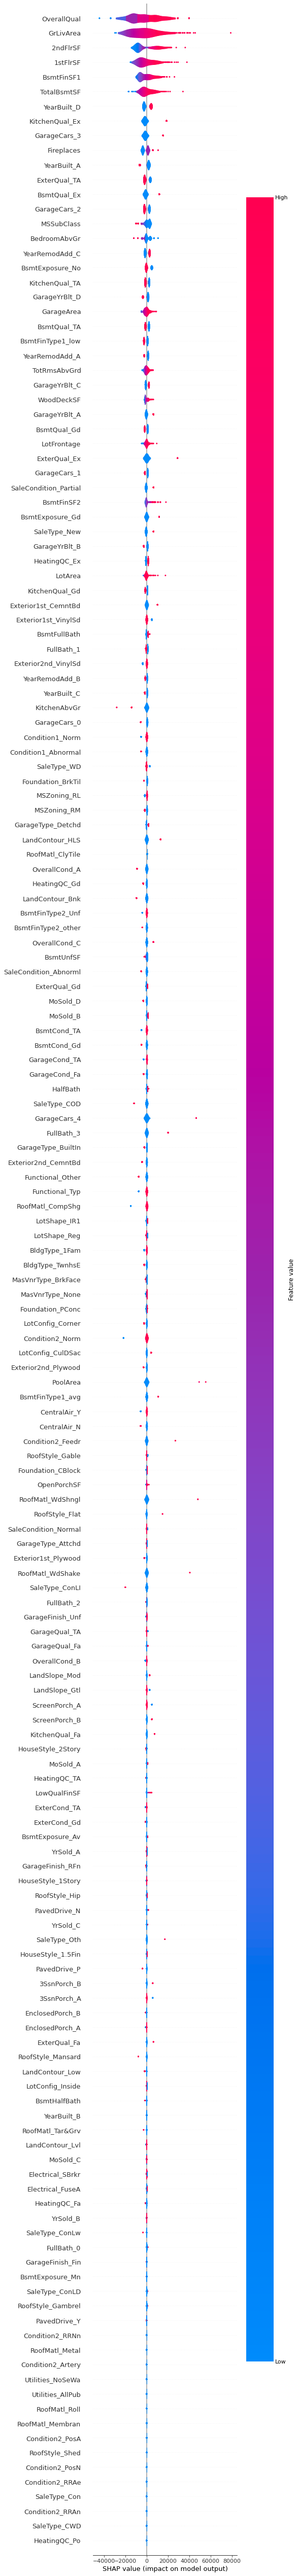

In [133]:
shap_summary_plot(df, features=features1)

**Observations**

test score of .858 a very large number of features seem un important.  We will use this understanding to reduce where possible the number of features included.  

*Most important features*
+ OverallQual
+ GrLivArea
+ 2ndFlrSF
+ BsmtFinSF
+ 1stFlrSF
+ TotalBsmtF

*Unimportant features*
+ Condition2_artery -
+ Utilies_NoSeWa -
+ RoofMatl_ClyTile -
+ RoofMatl_Membran -
+ RoofMatl_Metal -
+ RoofMatl_Roll - 
+ Condition2_RRNn -
+ Condition2_PosA -
+ Condition2_RRAn -
+ SalesType_Con -
+ SalesType_CWD -
+ Utilites_AllPub - 
+ HeatingQC_Po -
+ Condition2_PosN -
+ LowQualFinSF - 
+ Electrical_FuseA -
+ Electrical_SBkr -
+ RoofMatl_Tar&Grv - 
+ Fullbath_2 - 
+ Condition2_RRAe -
+ SaleType_ConLw - 
+ RoofStyle_Shed - 
+ BsmtHalfBath -
+ RoofStyle_Mansard -
+ LotConfig_Inside -
+ SalesCondition_Normal - 
+ SalesCondition_Gambrel (slight positive help)
+ PavedDrive_N -
+ SaleType_ConLD (slight positive help) -
+ EnclosedPorch_A -
+ EnclosedPorch_B -
+ YrSold_A -
+ RoofStyle_Hip -
+ ExterCond_TA - 
+ ExterCond_Gd - 
+ HeatingQc_TA -
+ SaleType_Oth -
+ PavedDrive_Y -
+ KitchenAbvGr -
+ BsmtFinType2_other -
+ PavedDrive_P - 
+ SaleType_ConLI -
+ MasVnrType_None -
+ PoolArea -
+ GarageCars_4 -
+ RoofMatl_WdShngl -
+ RoofMatl_WdShake -
+ Condition2_Feedr -
+ LandSlope_Gtl -
+ LandSlope_Mod -
+ 3SsnPorch_B -
+ YearBuilt_B -
+ SaleType_WD -
+ ExterQual_Fa -
+ HouseStyle_1.5Fin -
+ MoSold_D - 
+ LandContour_Low -
+ ScreenPorch_B -
+ ScreenPorch_A -
+ Condition2_Norm -
+ RoofMatl_CompShg -
+ GarageCond_TA -
+ GarageCond_Fa -
+ YearBuilt_C -
+ CentralAir_N -
+ CentralAir_Y -
+ GarageFinish_Fin -
+ YearBuilt_A -
+ SaleType_COD -
+ GarageQual_TA -
+ GarageQual_Fa -
+ HeatingQC_Fa -
+ GarageYrBlt_A -
+ SaleCondition_Abnorml -
+ Exterior2nd_VinylSd -
+ KitchenQual_Fa -
+ TotalBsmtSF - 
+ Exterior1st_Plywood -
+ OverallCond_C -
+ GarageType_Detchd - 
+ FullBath_3 
+ BsmtFinType2_Unf -
+ LandContour_Bnk - 
+ BsmtCond_Gd -
+ BsmtCond_TA -
+ BsmtUnfSF -
+ BsmtExposure_Mn -
+ GarageCars_0 -
+ BsmtFinSF2 -
+ YrSold_C -
+ Exterior2nd_Plywood -
+ Foundation_PConc - 
+ MoSold_A - 
+ OverallCond_A -
+ Foundation_CBlock -
+ 2ndFlrSF -
+ Foundation_BrkTil -
+ FullBath_1 - 
+ GarageFinish_RFn -
+ MoSold_C - 
+ GarageYrBlt_D -
+ Functional_Typ -
+ YearRemodAdd_B -
+ ExterQual_Gd -
+ Functional_Other -
+ OverallCond_B -
+ YearRemodAdd_A -
+ GarageCars_1 -
+ HeatingQC_Gd - 
+ GarageArea -
+ HouseStyle_1Story - 
+ MoSold_B -
+ GarageFinish_Unf -
+ RoofStyle_Gambrel -
+ BldgType_1Fam -
+ BldgType_TwnhsE -
+ GarageType_BuiltIn -
+ Exterior1st_CemntBd -
+ Exterior2nd_CemntBd -
+ GarageYrBlt_C -
+ MasVnrType_BrkFace
+ BsmtExposure_No -
+ OpenPorchSF -
+ Condition1_Abnormal -
+ LandContour_Lvl -
+ HouseStyle_2Story -
+ Exterior1st_VinylSd -
+ GarageYrBlt_B -
+ BsmtQual_Gd -
+ HalfBath -
+ MSZoning_RL -
+ BsmtQual_TA -
+ ExterQual_TA -
+ MasVnrType_BrkFace -
+ HeatingQC_Ex -
+ LotShape_Reg -
+ Condition1_Norm - 
+ BedroomAbvGr
+ SaleCondition_Partial -
+ KitchenQual_TA -
+ TotRmsAbvGrd - 

## Features Reduce

In [134]:
features2 = [
              'MSSubClass','LotFrontage', 'LotArea','OverallQual',#'BsmtFinSF1',
              # 'BsmtFinSF2', #'BsmtUnfSF', #'TotalBsmtSF',
              '1stFlrSF', #'2ndFlrSF','LowQualFinSF', 
              'GrLivArea', 'BsmtFullBath', #'BsmtHalfBath', 
              # 'HalfBath',
              'BedroomAbvGr',#'KitchenAbvGr',
            #  'TotRmsAbvGrd',
             'Fireplaces',
              # 'GarageArea', 
             'WoodDeckSF', #'OpenPorchSF',
             'PoolArea',
             # dummies
              # 'MSZoning_RL',# 'MSZoning_RM',
              'LotShape_IR1', #'LotShape_Reg',
              # 'LandContour_Bnk',# 'LandContour_HLS', #'LandContour_Low',
              # 'LandContour_Lvl',# 'Utilities_AllPub', #'Utilities_NoSeWa',
              # 'LotConfig_Corner', 'LotConfig_CulDSac', #'LotConfig_Inside',
              'LandSlope_Gtl',# 'LandSlope_Mod', 
            #  'Condition1_Abnormal',
              # 'Condition1_Norm', #'Condition2_Artery','Condition2_Feedr',
              # 'Condition2_Norm',# 'Condition2_PosA',
            #  'Condition2_PosN','Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn',
              # 'BldgType_1Fam','BldgType_TwnhsE',# 'HouseStyle_1.5Fin',
              # 'HouseStyle_1Story',
              # 'HouseStyle_2Story',# 'OverallCond_A',
              # 'OverallCond_B', #'OverallCond_C',# 'YearBuilt_A',# 'YearBuilt_B',
              # 'YearBuilt_C',
              'YearBuilt_D', #'YearRemodAdd_A', #'YearRemodAdd_B',
              'YearRemodAdd_C', #'RoofStyle_Flat',
              'RoofStyle_Gable', 'LotConfig_CulDSac',
              # 'RoofStyle_Gambrel',# 'RoofStyle_Hip', #'RoofStyle_Mansard',
              # 'RoofStyle_Shed',# 'RoofMatl_ClyTile',
              # 'RoofMatl_CompShg',
              #'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll','RoofMatl_Tar&Grv',
              # 'RoofMatl_WdShake',
              'RoofMatl_WdShngl',# 'Exterior1st_CemntBd', #'Exterior1st_Plywood',
              # 'Exterior1st_VinylSd',
              # 'Exterior2nd_CemntBd', #'Exterior2nd_Plywood',# 'Exterior2nd_VinylSd',
              # 'MasVnrType_BrkFace',# 'MasVnrType_None',
              'ExterQual_Ex',# 'ExterQual_Fa',#'ExterQual_Gd',
            #  'ExterQual_TA',# 'ExterCond_Gd', 'ExterCond_TA','Foundation_BrkTil',
              # 'Foundation_CBlock', #'Foundation_PConc',
              'BsmtQual_Ex',# 'BsmtQual_Gd',
              # 'BsmtQual_TA', #'BsmtCond_Gd','BsmtCond_TA', #'BsmtExposure_Av',
              'BsmtExposure_Gd', #'BsmtExposure_Mn',
              # 'BsmtExposure_No',
              'BsmtFinType1_avg', 'BsmtFinType1_low', #'BsmtFinType2_Unf',
              # 'BsmtFinType2_other',
              # 'HeatingQC_Ex',# 'HeatingQC_Fa','HeatingQC_Gd',
              # 'HeatingQC_Po','HeatingQC_TA',
              # 'CentralAir_N', 'CentralAir_Y',
              # 'Electrical_FuseA', 'Electrical_SBrkr','FullBath_0', 
            #  'FullBath_1','FullBath_2', 
              'FullBath_3', 
             'KitchenQual_Ex', #'KitchenQual_Fa',
              'KitchenQual_Gd', #'KitchenQual_TA',# 'Functional_Other',
              # 'Functional_Typ', 
             'GarageType_Attchd',# 'GarageType_BuiltIn',
              # 'GarageType_Detchd',# 'GarageYrBlt_A', 
            #  'GarageYrBlt_B', #'GarageYrBlt_C',
              # 'GarageYrBlt_D', #'GarageFinish_Fin',
              # 'GarageFinish_RFn',
              # 'GarageFinish_Unf', #'GarageCars_0','GarageCars_1',
              'GarageCars_2','GarageCars_3', 'GarageCars_4', 
            #  'GarageQual_Fa', 'GarageQual_TA',
              # 'GarageCond_Fa', 'GarageCond_TA',# 'PavedDrive_N',
            #  'PavedDrive_P','PavedDrive_Y', #'EnclosedPorch_A', 'EnclosedPorch_B', 
            '3SsnPorch_A','3SsnPorch_B',
            #  'ScreenPorch_A', 'ScreenPorch_B',
              # 'MoSold_A', 
            #  'MoSold_B',
              # 'MoSold_C',# 'MoSold_D',# 'YrSold_A',
             #'YrSold_B','YrSold_C',
              # 'SaleType_COD', #'SaleType_CWD', 'SaleType_Con',
              # 'SaleType_ConLD','SaleType_ConLI', #'SaleType_ConLw',
              'SaleType_New',# 'SaleType_Oth','SaleType_WD',
              #  'SaleCondition_Abnorml', # 'SaleCondition_Normal',
            #  'SaleCondition_Partial'
                ]
target = ['SalePrice']

### Summary Plot on Reduced Features

  0%|          | 0/438 [00:00<?, ?it/s]

test_score: 0.8625276287007547


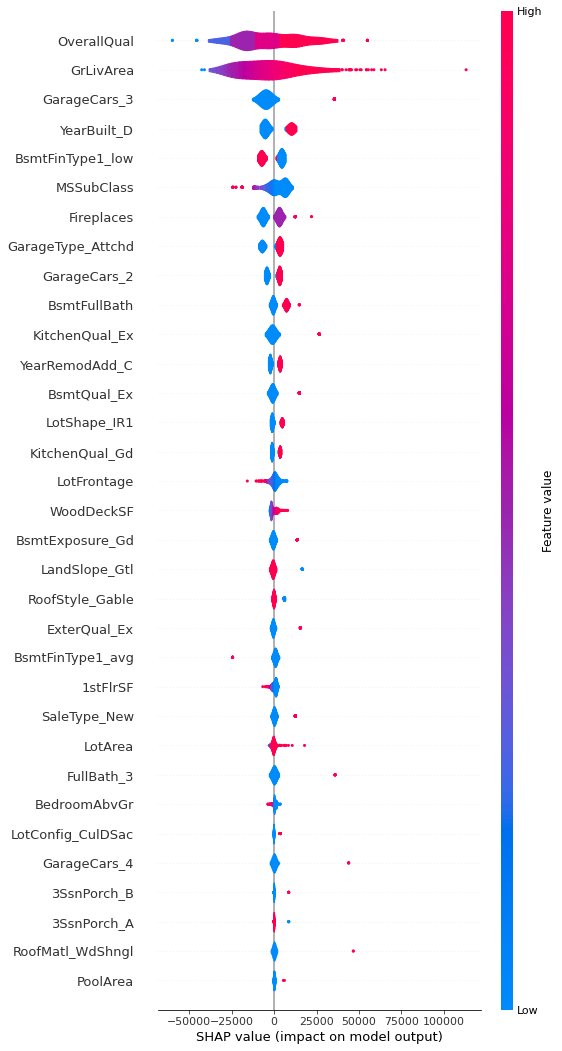

In [135]:
shap_summary_plot(df, features=features2)

# Feature Reduction Features Summary

**Important Features**

*Descripitive*
+ OverallQual
+ MSSubClass
+ Fireplaces
+ YearBuilt_D
+ 1stFlrSF -
+ TotRmsAbvGrd -
+ BedroomAbvGrd

*Lot*
+ LotFrontage
+ LotShape_IR1
+ LotArea

*Exterior*
+ WoodDeckSF
+ ExterQual_Ex

*Living Area*
+ GrLivArea

*Bathrooms*
+ FullBaths_3

*Kitchens*
+ KitchenQual_TA -
+ KitchenQual_Gd
+ KitchenQual_Ex

*Garage*
+ GarageCars_2
+ GarageCars_3
+ GarageType_Attchd
+ YearRemodAdd_C

*Basement*
+ BsmtFullBath
+ BsmtFinType_low
+ BsmtFinType_avg
+ BsmtFinSF1
+ BsmtExposure_Gd
+ BsmtQual_Ex

*Roof*
+ RoofStyle_Gable

*SalesType*
+ SalesCondition_Partial -
+ SalesCondition_New

**Unimportant Features**



# Feature Reduction Features Summary


## def model_factory


## def model_scorer

In [136]:

def model_factory(model, feats):
  X_tr, X_ts, y_tr, y_ts = train_test_split(df[feats], df[target], random_state=42)
  model.fit(X_tr, y_tr)
  score_tr = model.score(X_tr, y_tr)
  score_ts = model.score(X_ts, y_ts)
  
  score_cv = np.mean(cross_val_score(model,df[feats], df[target], cv=10))
  return score_tr, score_ts, score_cv

def model_scores(models, feats):
  train_scores = []
  test_scores = []
  cv_scores = []
  mdl = []
  num_feats = []

  for (model,name) in models:
    for feats in features:
      score_tr, score_ts, score_cv = model_factory(model, feats)
      train_scores.append(score_tr)
      test_scores.append(score_ts)
      cv_scores.append(score_cv)
      num_feats.append(len(feats))
      mdl.append(name)
      score_dict = {'num_feat':num_feats,'train_score':train_scores,'test_score':test_scores,'cv_score':cv_scores}
      df_score = pd.DataFrame(score_dict, index=mdl)

  return df_score

In [137]:
models = [(ARDRegression(), 'ARD')]
features = [features1, features2]
model_scores(models,features)

,num_feat,train_score,test_score,cv_score
ARD,173,0.855444,0.859976,0.831013
ARD,33,0.836183,0.858318,0.827278


In [138]:
print(f'reduced features by {len(features1)-len(features2)} from {len(features1)} to {len(features2)}')

reduced features by 140 from 173 to 33


## ARDRegression Coefficient

In [139]:
ard = ARDRegression().fit(StandardScaler().fit_transform(df[features2]),
                          df[target])
ard_coefs = ard.coef_
pd.DataFrame(ard_coefs, index=features2, columns=['coefs']).sort_values('coefs', ascending=False)

,coefs
GrLivArea,23148.099824
OverallQual,19911.320438
GarageCars_3,13068.052732
KitchenQual_Ex,8857.229535
YearBuilt_D,6247.872618
FullBath_3,5845.499899
Fireplaces,5253.090361
BsmtExposure_Gd,4833.200871
RoofMatl_WdShngl,4195.037125
BsmtFullBath,3959.133532


## Best Model Selection

In [140]:
models = [(ARDRegression(), 'ARD'),
          (LinearRegression(), 'reg'),
          (ElasticNet(), 'regr'),
          (GradientBoostingRegressor(learning_rate=.009, n_estimators=500,
                                     subsample=.9, min_samples_split=3,
                                     max_features=.9, ccp_alpha=.0016), 'gdr'),
          (BaggingRegressor(max_samples=.9, max_features=.9,
                            n_estimators=15 ), 'bag')
          ]
features = [features1, features2]
model_scores(models,features).sort_values('cv_score', ascending=False)

,num_feat,train_score,test_score,cv_score
gdb,173,0.940549,0.895504,0.873624
bag,173,0.971862,0.886526,0.859684
gdb,33,0.929713,0.880447,0.853733
reg,33,0.842220,0.860308,0.835550
ARD,173,0.855444,0.859976,0.831013
bag,33,0.953094,0.883702,0.829191
ARD,33,0.836183,0.858318,0.827278
reg,173,0.911081,0.887716,0.811543
regr,173,0.816509,0.842539,0.809352
regr,33,0.783157,0.818394,0.789186


## Competition Predictions

In [141]:
# defining short list of final features for competition predictions
features3 = [
              'MSSubClass','LotFrontage', 'LotArea','OverallQual',
              '1stFlrSF','GrLivArea', 'BsmtFullBath',
              'BedroomAbvGr',
             'Fireplaces',
             'WoodDeckSF','PoolArea', 
             # dummies
              
              'LotShape_IR1','LandSlope_Gtl','RoofMatl_WdShngl',
             'YearBuilt_D', 'YearRemodAdd_C','RoofStyle_Gable',
              'ExterQual_Ex', 'BsmtQual_Ex','BsmtExposure_Gd',
              'BsmtFinType1_avg', #'BsmtFinType1_low', 
              'FullBath_3', 'KitchenQual_Ex','KitchenQual_Gd', 
             'GarageType_Attchd', '3SsnPorch_A','3SsnPorch_B',
              # 'GarageCars_2','GarageCars_3',
            #  'GarageCars_4',
              'SaleType_New','LotConfig_CulDSac',
                ]

In [142]:
# assigning x, y
X_tr = df[features3]
y_tr = df[target]
X_ts = df_test[features3]
# y_ts = df_test[target]


In [143]:
# standardize features
std_scaler = StandardScaler().fit(X_tr)
X_tr = std_scaler.transform(X_tr)
X_ts = std_scaler.transform(X_ts)

In [144]:
# checking for null values
df_test[features3].isnull().sum()

MSSubClass           0
LotFrontage          0
LotArea              0
OverallQual          0
1stFlrSF             0
GrLivArea            0
BsmtFullBath         0
BedroomAbvGr         0
Fireplaces           0
WoodDeckSF           0
PoolArea             0
LotShape_IR1         0
LandSlope_Gtl        0
RoofMatl_WdShngl     0
YearBuilt_D          0
YearRemodAdd_C       0
RoofStyle_Gable      0
ExterQual_Ex         0
BsmtQual_Ex          0
BsmtExposure_Gd      0
BsmtFinType1_avg     0
FullBath_3           0
KitchenQual_Ex       0
KitchenQual_Gd       0
GarageType_Attchd    0
3SsnPorch_A          0
3SsnPorch_B          0
SaleType_New         0
LotConfig_CulDSac    0
dtype: int64

In [145]:
# pca = PCA().fit(X_tr)
# X_tr = pca.transform(X_tr)
# X_ts = pca.transform(X_ts)

In [147]:
model = GradientBoostingRegressor(learning_rate=.009, n_estimators=550,
                                     subsample=.9, min_samples_split=3,
                                     max_features=.9, ccp_alpha=.0016).fit(X_tr, y_tr)
# model = ARDRegression().fit(X_tr, y_tr)
print('score', np.mean(cross_val_score(model,X_tr, y_tr, cv=10)))
y_pred = pd.Series(model.predict(X_ts), index=df_test.index)

score 0.8539561332197174


In [148]:
dict_pred = {'Id':test_ids, 'SalePrice':y_pred}

y_pred = pd.DataFrame(dict_pred)

In [149]:
y_pred.to_csv('predictions.csv', index=False)

# Position 2889 on Jun 22, 2022 first submission.  What do you get?

Post your score on my page and let me know how you ranked and what you did to acheive.  Shared it as so post so other students can learn.

https://www.facebook.com/datascienceteacherbrandyn